<div style="border:solid Chocolate 2px; padding: 40px">

<b>Денис, привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю построить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
<div class="alert alert-info">
<b>А свой помечай вот так, чтобы я его не потерял ;)</b> 
</div>
    
На мои комменатрии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!

# Исследование о продажах компьютерных игр
В нашем распоряжении исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования:**

    1. Определить суммарные продажи по регионам
    2. Определить актуальный период исследования
    3. Составить актуальный портрет пользователя каждого региона
    4. Проверить гипотезы о равенстве рейтингов  платформ Xbox One и PC и жанров Action и Sports
    
**Ход исследования:**
    
    1. Обзор данных датасета /datasets/games.csv
    2. Предобработка данных
    3. Расчеты и добавление данных в таблицу
    4. Проведение анализа по годам
    5. Проведение анализа по платформам
    6. Проведение анализа по жанрам
    7. Проведение сравнительного анализа для разных регионов
    8. Проверка гипотез
    9. Общий вывод


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Супер введение) Лайк за навигацию)
    

## Откройте файл с данными и изучите общую информацию. 

### Импорт библиотек и общая информация

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np 

pd.set_option('display.max_columns', None) 

pd.options.display.float_format = '{:.2f}'.format

data_first = pd.read_csv('/datasets/games.csv')

data = pd.read_csv('/datasets/games.csv')

sns.set(rc = {'figure.figsize':(20,15)})

data.head() 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
data.info() #получаем общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


#### Построение гистограмм

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

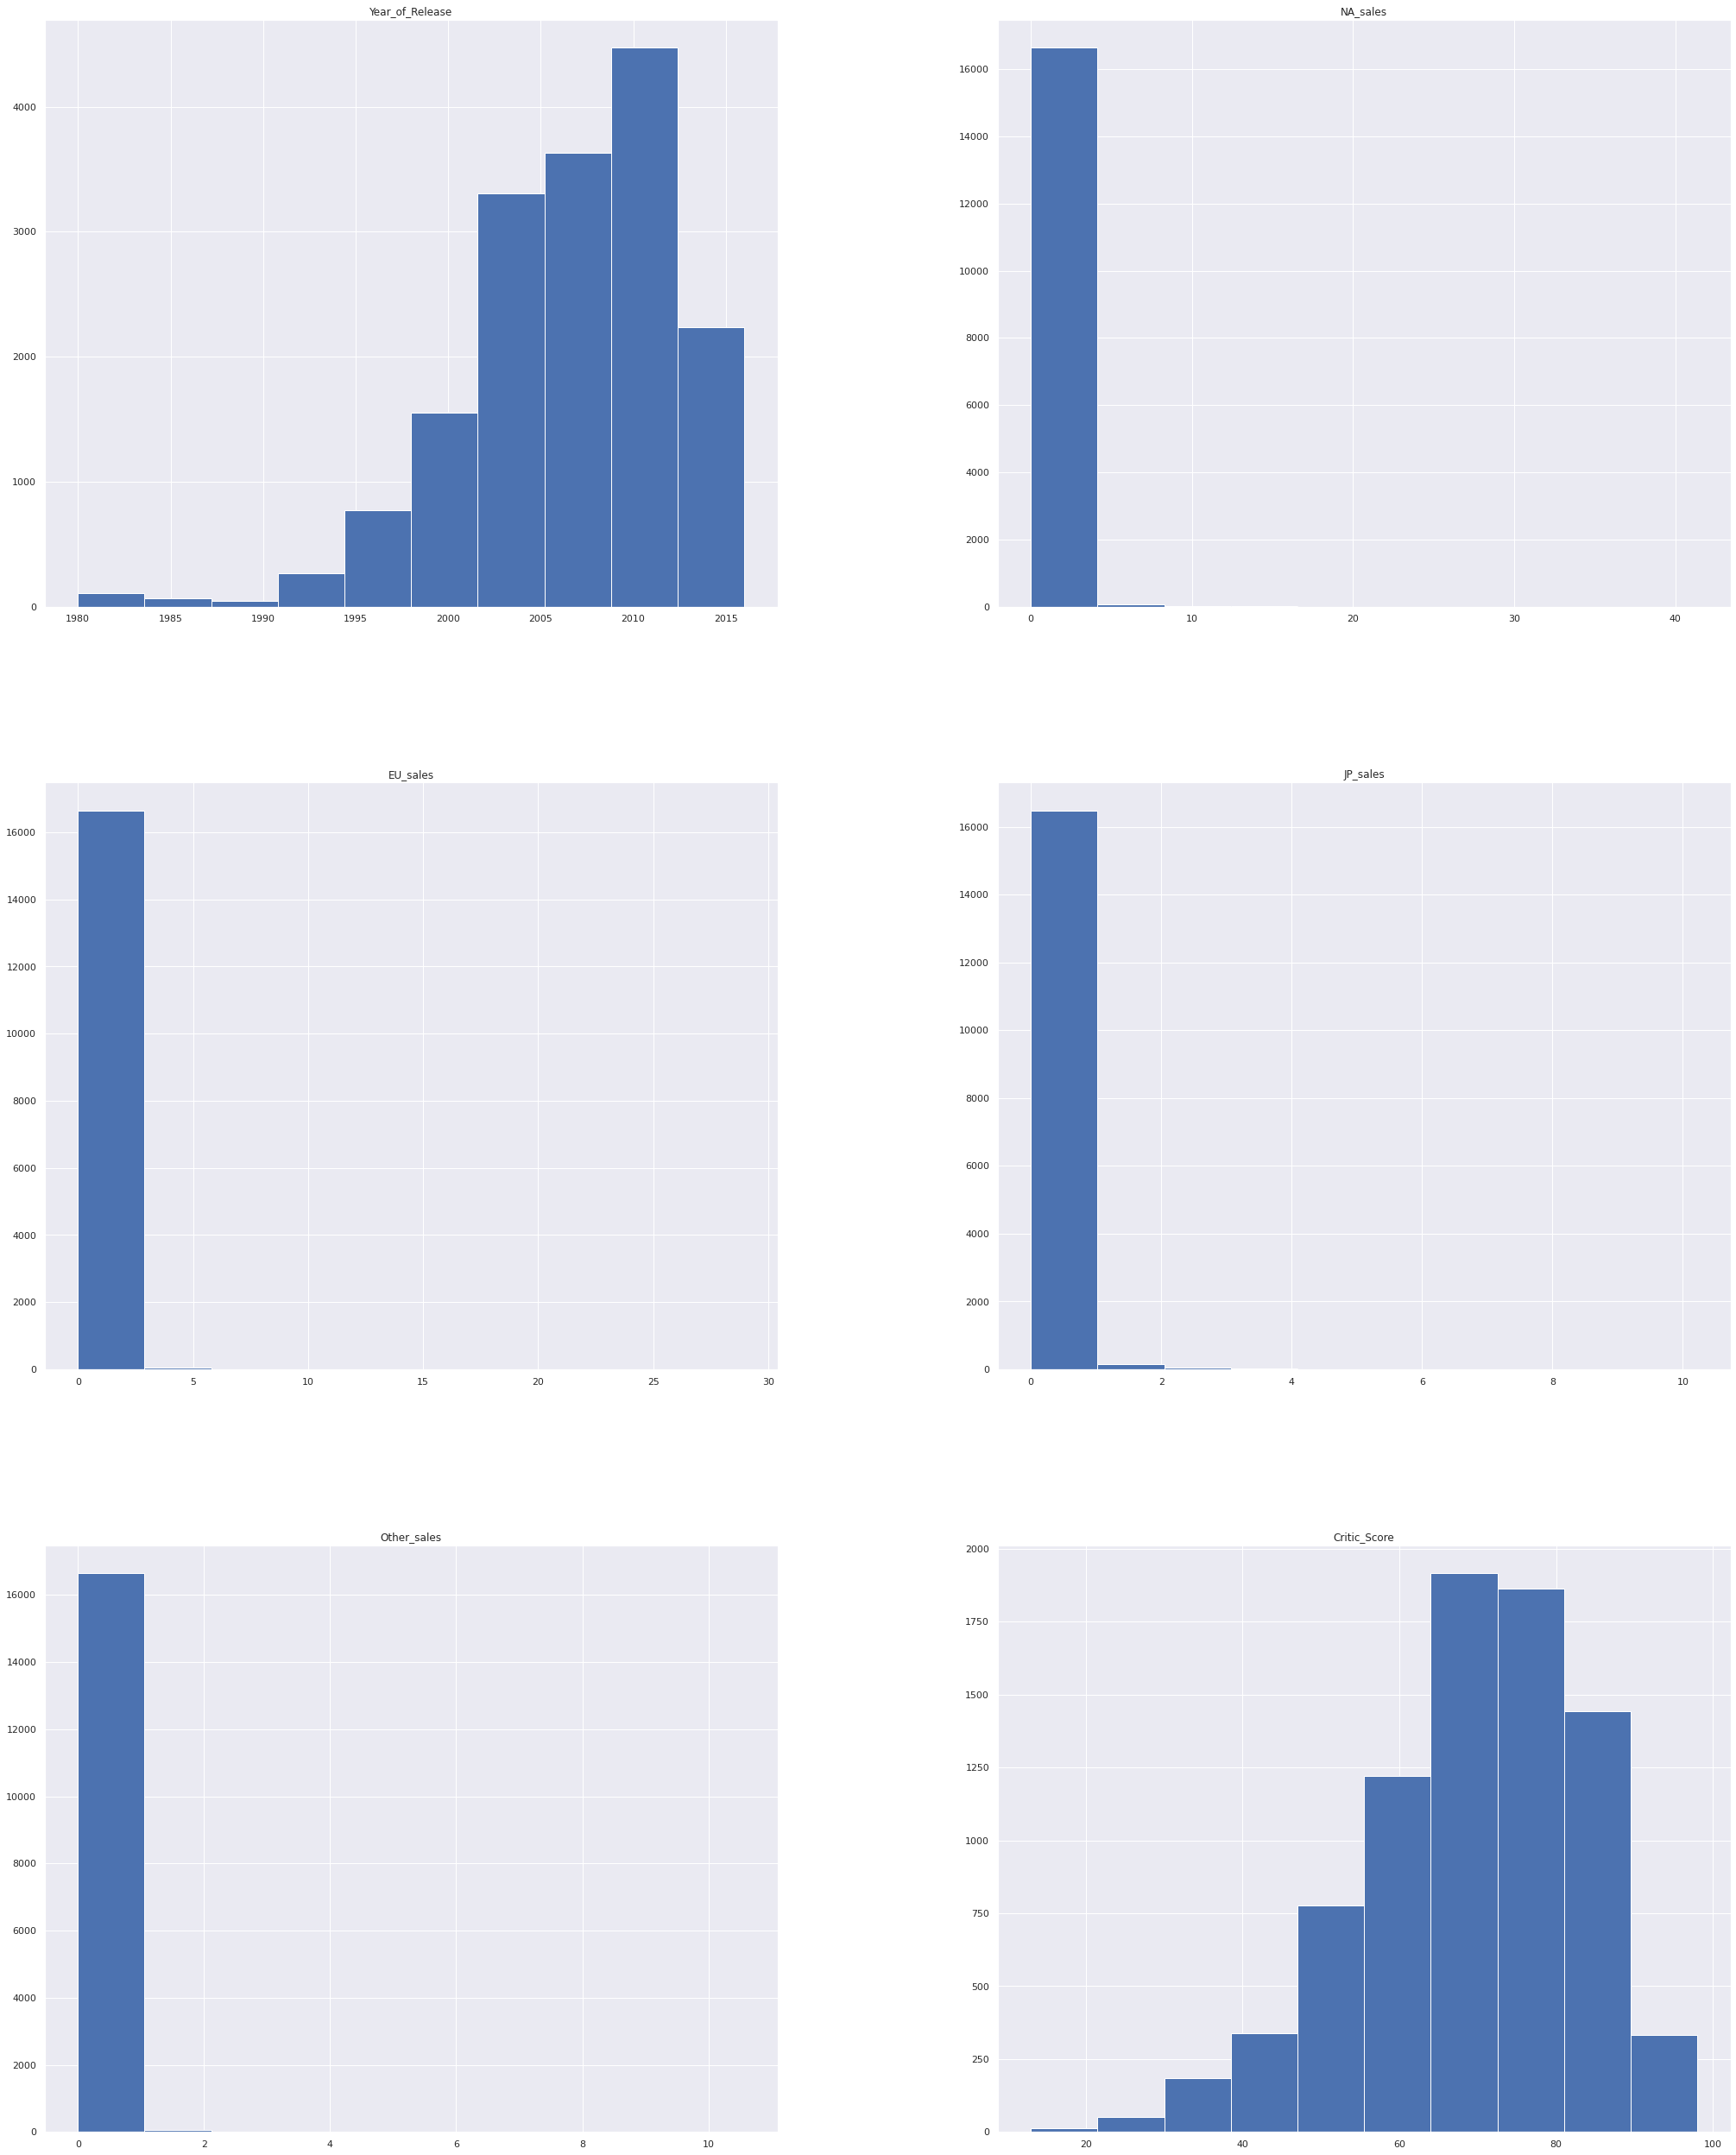

In [4]:
data.hist(figsize=(35, 45))

#### Вывод

В изначальном датасете 11 стобцов, 16715 строк, данные в форматах float и object. 

Необходимо провести предобработку данных: наблюдаются пропуски в нескольких столбцах, потенциально неудобные для работы типы данных, возможны дубликаты, аномалии и выбросы.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Сделаем вывод по обзору данных? 

<div class="alert alert-info">
<b>Поправил</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Лайк

## Предобработка данных

### Работа с пропусками

#### Общее количество пропусков

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b>Сортировка - хороший тон) 

<div class="alert alert-info">
<b>Честно говоря, не считаю, что в этом случае требуется сортировка)</b> 
</div>

#### Колонка Name

Ключевой параметр, всего 2 пропуска, удаляем строки с пропусками, не повлияет на исследование.

In [6]:
data = data.dropna(subset=['Name'])

#### Колонка Year_of_Release

Для комфортного переформатирования поставим заглушки 

In [7]:
data['Year_of_Release'] = data['Year_of_Release'].fillna(66666)

#### Колонка Genre

Всего 2 пропуска, удаляем строки с пропусками, не повлияет на исследование.

In [8]:
data = data.dropna(subset=['Genre'])

#### Колонки Critic_Score, User_Score

Для комфортного переформатирования поставим заглушки 

In [9]:
data['Critic_Score'] = data['Critic_Score'].fillna(66666)
data['User_Score'] = data['User_Score'].fillna(66666)

#### Колонка 'Rating'

По каким-то причинам возрастной рейтинг не установлен, поменяем значения на No_Rate

In [10]:
data['Rating'] = data['Rating'].fillna('No_Rate')

#### Проверяем таблицу на пропуски

In [11]:
data.isna().sum() 

Name               0
Platform           0
Year_of_Release    0
Genre              0
NA_sales           0
EU_sales           0
JP_sales           0
Other_sales        0
Critic_Score       0
User_Score         0
Rating             0
dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Хорошечно, молодец) 

### Работа с типами данных

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16713 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     16713 non-null  float64
 9   User_Score       16713 non-null  object 
 10  Rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Колонка Year_of_Release

Год выпуска - целое число, стоит переформатировать в int

In [13]:
data['Year_of_Release'] = data['Year_of_Release'].astype('int')

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Окей

#### Колонка Critic_Score

In [14]:
data['Critic_Score'].unique()

array([7.6000e+01, 6.6666e+04, 8.2000e+01, 8.0000e+01, 8.9000e+01,
       5.8000e+01, 8.7000e+01, 9.1000e+01, 6.1000e+01, 9.7000e+01,
       9.5000e+01, 7.7000e+01, 8.8000e+01, 8.3000e+01, 9.4000e+01,
       9.3000e+01, 8.5000e+01, 8.6000e+01, 9.8000e+01, 9.6000e+01,
       9.0000e+01, 8.4000e+01, 7.3000e+01, 7.4000e+01, 7.8000e+01,
       9.2000e+01, 7.1000e+01, 7.2000e+01, 6.8000e+01, 6.2000e+01,
       4.9000e+01, 6.7000e+01, 8.1000e+01, 6.6000e+01, 5.6000e+01,
       7.9000e+01, 7.0000e+01, 5.9000e+01, 6.4000e+01, 7.5000e+01,
       6.0000e+01, 6.3000e+01, 6.9000e+01, 5.0000e+01, 2.5000e+01,
       4.2000e+01, 4.4000e+01, 5.5000e+01, 4.8000e+01, 5.7000e+01,
       2.9000e+01, 4.7000e+01, 6.5000e+01, 5.4000e+01, 2.0000e+01,
       5.3000e+01, 3.7000e+01, 3.8000e+01, 3.3000e+01, 5.2000e+01,
       3.0000e+01, 3.2000e+01, 4.3000e+01, 4.5000e+01, 5.1000e+01,
       4.0000e+01, 4.6000e+01, 3.9000e+01, 3.4000e+01, 3.5000e+01,
       4.1000e+01, 3.6000e+01, 2.8000e+01, 3.1000e+01, 2.7000e

Оценка пользователя - целое число,  стоит переформатировать в int

In [15]:
data['Critic_Score'] = data['Critic_Score'].astype('int')

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>хорошечно

#### Колонка User_Score

In [16]:
data['User_Score'].unique()

array(['8', 66666, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Оценка пользователя представлена в виде дроби, для удобства сравнения с оценками критиков можно привести к стобальной системе и  переформатировать в int.

In [17]:
data[data['User_Score'] == 'tbd']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,66666,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,66666,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,66666,Adventure,2.15,0.18,0.00,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,66666,tbd,E


Аббревиатура 'tbd' расшифровывается как 'to be determined', скорее всего она связана с недостачным количеством отзывов по играм и как следствие - с недостаточным количеством продаж. Добавим колонку 'All_sales'. Проверяем.

In [18]:
data['All_sales'] = data['NA_sales'] + data['EU_sales'] + data['JP_sales'] + data['Other_sales']
data[(data['User_Score'] == 'tbd') & (data['Critic_Score'] == 66666)].sort_values(by = 'All_sales', ascending=False)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,All_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,66666,tbd,E,6.70
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,66666,tbd,T,2.81
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,66666,tbd,E,2.24
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,66666,tbd,E10+,2.22
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,66666,tbd,E,1.94
...,...,...,...,...,...,...,...,...,...,...,...,...
16093,Smart Kid's Mega Game Mix,DS,2009,Misc,0.01,0.00,0.00,0.00,66666,tbd,No_Rate,0.01
16076,King's Quest: The Complete Collection,PS4,2016,Adventure,0.01,0.00,0.00,0.00,66666,tbd,E10+,0.01
16061,I Love Horses: Rider's Paradise,Wii,2010,Simulation,0.01,0.00,0.00,0.00,66666,tbd,E,0.01
16044,Turbo: Super Stunt Squad,Wii,2013,Sports,0.00,0.01,0.00,0.00,66666,tbd,E,0.01


<div class="alert alert-success">
<h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Столбец добавлен верно, но для подсчета суммарных продаж рекомендую использовать следующую конструкцию 
    
    
    games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<div class="alert alert-info">
<b>Понял, спасибо, учту на будущее</b> 
</div>

Проверка показала, что как минимум не всегда недостаточное количество отзывов означает недостаточное количество продаж, также со значением 'tbd' игры разных годов релиза, так что мы не можем сказать, что рейтинг не успели присвоить. 
Приравняем tbd к пропускам и поставим заглушки.

In [19]:
data['User_Score'] = data['User_Score'].replace('tbd', '6666.6')

In [20]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,All_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,66666,66666,No_Rate,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,66666,66666,No_Rate,31.38


In [21]:
data['User_Score'] = data['User_Score'].replace(66666, '6666.6')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16713 non-null  int64  
 3   Genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     16713 non-null  int64  
 9   User_Score       16713 non-null  object 
 10  Rating           16713 non-null  object 
 11  All_sales        16713 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1.7+ MB


In [23]:
data['User_Score'].unique()

array(['8', '6666.6', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3',
       '7.4', '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8',
       '3.2', '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3',
       '4.3', '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [24]:
data['User_Score'] = data['User_Score'].astype('float')
data['User_Score'].round(1)
data['User_Score'] = (data['User_Score'] * 10).astype('int')


In [25]:
data['User_Score'].unique()

array([   80, 66666,    83,    85,    66,    84,    86,    77,    63,
          74,    82,    90,    79,    81,    87,    71,    34,    53,
          48,    32,    89,    64,    78,    75,    26,    72,    92,
          70,    73,    43,    76,    57,    50,    91,    65,    88,
          69,    94,    68,    61,    67,    54,    40,    49,    45,
          93,    62,    42,    60,    37,    41,    58,    56,    55,
          44,    46,    59,    39,    31,    29,    52,    33,    47,
          51,    35,    25,    19,    30,    27,    22,    20,    95,
          21,    36,    28,    18,    38,     0,    16,    96,    24,
          17,    11,     3,    15,     7,    12,    23,     5,    13,
           2,     6,    14,     9,    10,    97])

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ага, хорошо) 

#### Проверка

In [26]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16713 non-null  int64  
 3   Genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     16713 non-null  int64  
 9   User_Score       16713 non-null  int64  
 10  Rating           16713 non-null  object 
 11  All_sales        16713 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.7+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,All_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,66666,66666,No_Rate,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,66666,66666,No_Rate,31.38


### Работа с дубликатами

#### Проверка на явные дубликаты

In [27]:
data.duplicated().sum()

0

#### Проверка на неявные дубликаты

In [28]:
data['Name'].value_counts()

Need for Speed: Most Wanted     12
FIFA 14                          9
LEGO Marvel Super Heroes         9
Madden NFL 07                    9
Ratatouille                      9
                                ..
Agile Warrior F-111X             1
NCAA GameBreaker 2000            1
Garfield: Lasagna World Tour     1
Fighters Uncaged                 1
Watashi no Relaxuma              1
Name: Name, Length: 11559, dtype: int64

In [29]:
data[data['Name'] == 'Need for Speed: Most Wanted'].sort_values(by = 'Platform')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,All_sales
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,61,E,0.27
6473,Need for Speed: Most Wanted,GBA,2005,Racing,0.19,0.07,0.00,0.00,66666,83,E,0.26
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,91,T,0.56
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,85,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,85,T,0.08
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,91,T,4.37
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,66666,66666,No_Rate,2.81
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,66666,66666,No_Rate,1.01
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,66666,66666,No_Rate,0.27
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,85,T,1.56


In [30]:
data[data['Name'] == 'Ratatouille'].sort_values(by = 'Platform')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,All_sales
1598,Ratatouille,DS,2007,Action,0.49,0.62,0.00,0.14,66666,66666,No_Rate,1.25
7681,Ratatouille,GBA,2007,Action,0.14,0.05,0.00,0.00,65,66666,E,0.19
9015,Ratatouille,GC,2007,Action,0.11,0.03,0.00,0.00,60,56,E,0.14
14514,Ratatouille,PC,2007,Action,0.01,0.01,0.00,0.00,66666,79,E,0.02
2442,Ratatouille,PS2,2007,Action,0.31,0.00,0.00,0.53,65,80,E,0.84
3902,Ratatouille,PS3,2007,Action,0.09,0.32,0.00,0.10,55,48,E,0.51
3069,Ratatouille,PSP,2007,Action,0.22,0.27,0.00,0.16,64,71,E,0.65
3948,Ratatouille,Wii,2007,Action,0.43,0.03,0.00,0.04,62,67,E,0.50
6398,Ratatouille,X360,2007,Action,0.23,0.02,0.00,0.02,56,66666,E,0.27


In [31]:
data[data['Name'] == 'LEGO Marvel Super Heroes'].sort_values(by = 'Platform')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,All_sales
2313,LEGO Marvel Super Heroes,3DS,2013,Action,0.42,0.36,0.04,0.07,61,52,E10+,0.89
5054,LEGO Marvel Super Heroes,DS,2013,Action,0.22,0.13,0.00,0.03,66666,48,E10+,0.38
8369,LEGO Marvel Super Heroes,PC,2013,Action,0.04,0.12,0.00,0.01,78,81,E10+,0.17
945,LEGO Marvel Super Heroes,PS3,2013,Action,0.77,0.76,0.01,0.29,82,79,E10+,1.83
1139,LEGO Marvel Super Heroes,PS4,2013,Action,0.59,0.76,0.01,0.26,83,77,E10+,1.62
3876,LEGO Marvel Super Heroes,PSV,2013,Action,0.11,0.29,0.00,0.11,66666,66666,No_Rate,0.51
2778,LEGO Marvel Super Heroes,WiiU,2013,Action,0.31,0.35,0.02,0.06,82,80,E10+,0.74
730,LEGO Marvel Super Heroes,X360,2013,Action,1.24,0.79,0.00,0.19,80,76,E10+,2.22
1959,LEGO Marvel Super Heroes,XOne,2013,Action,0.61,0.35,0.00,0.09,66666,68,E10+,1.05


In [32]:
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Вероятнее всего, совпадение названий обусловлено выпуском игр на разных платформах. Кроме 'Need for Speed: Most Wanted', версия 2012 года которой, является перезапуском серии на PC и X360. Учитывая, что оценки критиков и пользователей совпадают, мы могли бы считать это одной игрой и объединить количество продаж или же изменить названия версий 2005 и 2012 года, если в дальнейшем ходе исследования нам это понадобится. Пока оставим без изменений.

In [33]:
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [34]:
data['Rating'].value_counts()

No_Rate    6764
E          3990
T          2961
M          1563
E10+       1420
EC            8
RP            3
K-A           3
AO            1
Name: Rating, dtype: int64

Рейтинг К-А - то же самое, что и Е: для всех (everyone), для детей и взрослых (kids-adults). Поменяем К-А на Е.

In [35]:
data['Rating'] = data['Rating'].replace('K-A', 'E', regex=True)

In [36]:
data['Rating'].value_counts()

No_Rate    6764
E          3993
T          2961
M          1563
E10+       1420
EC            8
RP            3
AO            1
Name: Rating, dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Отлично!

### Работа с аномалиями

#### Колонка Year_of_Release

In [37]:
data['Year_of_Release'].unique()

array([ 2006,  1985,  2008,  2009,  1996,  1989,  1984,  2005,  1999,
        2007,  2010,  2013,  2004,  1990,  1988,  2002,  2001,  2011,
        1998,  2015,  2012,  2014,  1992,  1997,  1993,  1994,  1982,
        2016,  2003,  1986,  2000, 66666,  1995,  1991,  1981,  1987,
        1980,  1983])

In [38]:
data_filtered = data[data['Year_of_Release'] != 66666]
data_filtered['Year_of_Release'].describe()

count   16444.00
mean     2006.49
std         5.88
min      1980.00
25%      2003.00
50%      2007.00
75%      2010.00
max      2016.00
Name: Year_of_Release, dtype: float64

array([[<AxesSubplot:title={'center':'Year_of_Release'}>]], dtype=object)

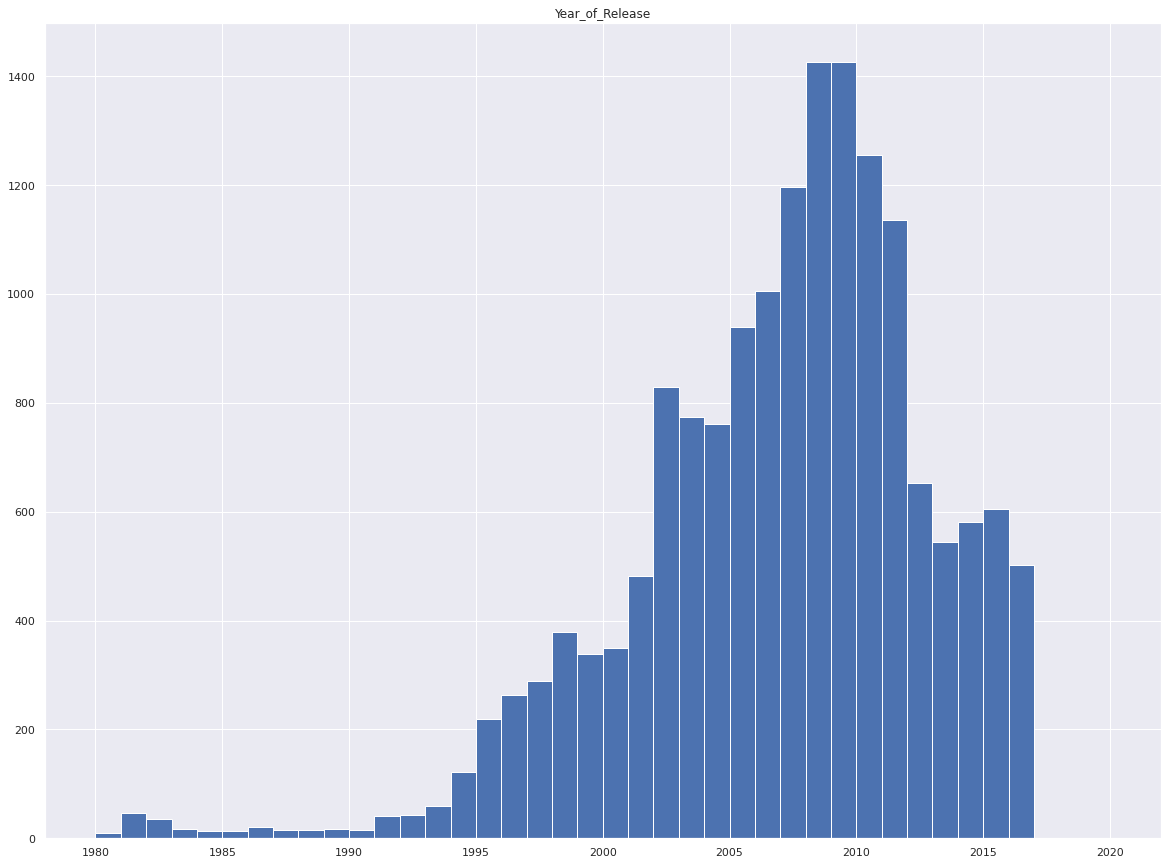

In [39]:
data.hist('Year_of_Release', range=(1980, 2020), bins=40)

#### Колонка Genre

In [40]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

<AxesSubplot:ylabel='Жанр'>

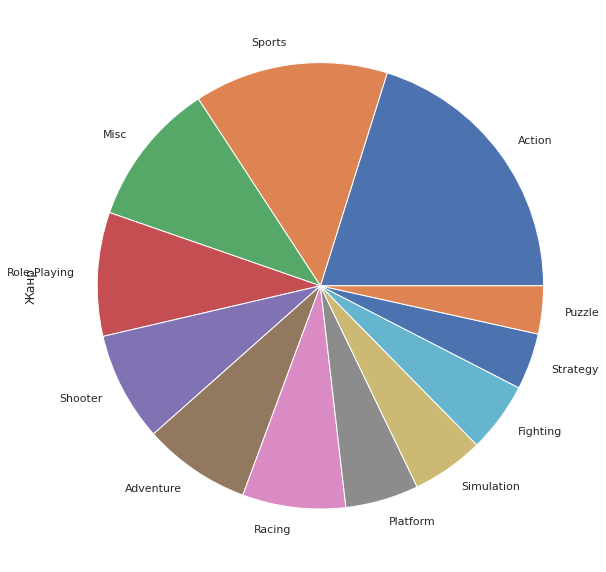

In [41]:
data['Genre'].value_counts().plot(ylabel='Жанр', kind='pie', figsize = (10, 15)) #строим гистограммы

#### Колонки с продажами

In [42]:
print(data['NA_sales'].describe())
print()
print(data['EU_sales'].describe())
print()
print(data['JP_sales'].describe())
print()
print(data['Other_sales'].describe())
print()
print(data['All_sales'].describe())

count   16713.00
mean        0.26
std         0.81
min         0.00
25%         0.00
50%         0.08
75%         0.24
max        41.36
Name: NA_sales, dtype: float64

count   16713.00
mean        0.15
std         0.50
min         0.00
25%         0.00
50%         0.02
75%         0.11
max        28.96
Name: EU_sales, dtype: float64

count   16713.00
mean        0.08
std         0.31
min         0.00
25%         0.00
50%         0.00
75%         0.04
max        10.22
Name: JP_sales, dtype: float64

count   16713.00
mean        0.05
std         0.19
min         0.00
25%         0.00
50%         0.01
75%         0.03
max        10.57
Name: Other_sales, dtype: float64

count   16713.00
mean        0.53
std         1.55
min         0.00
25%         0.06
50%         0.17
75%         0.47
max        82.54
Name: All_sales, dtype: float64


Text(0, 0.5, 'Количество продаж')

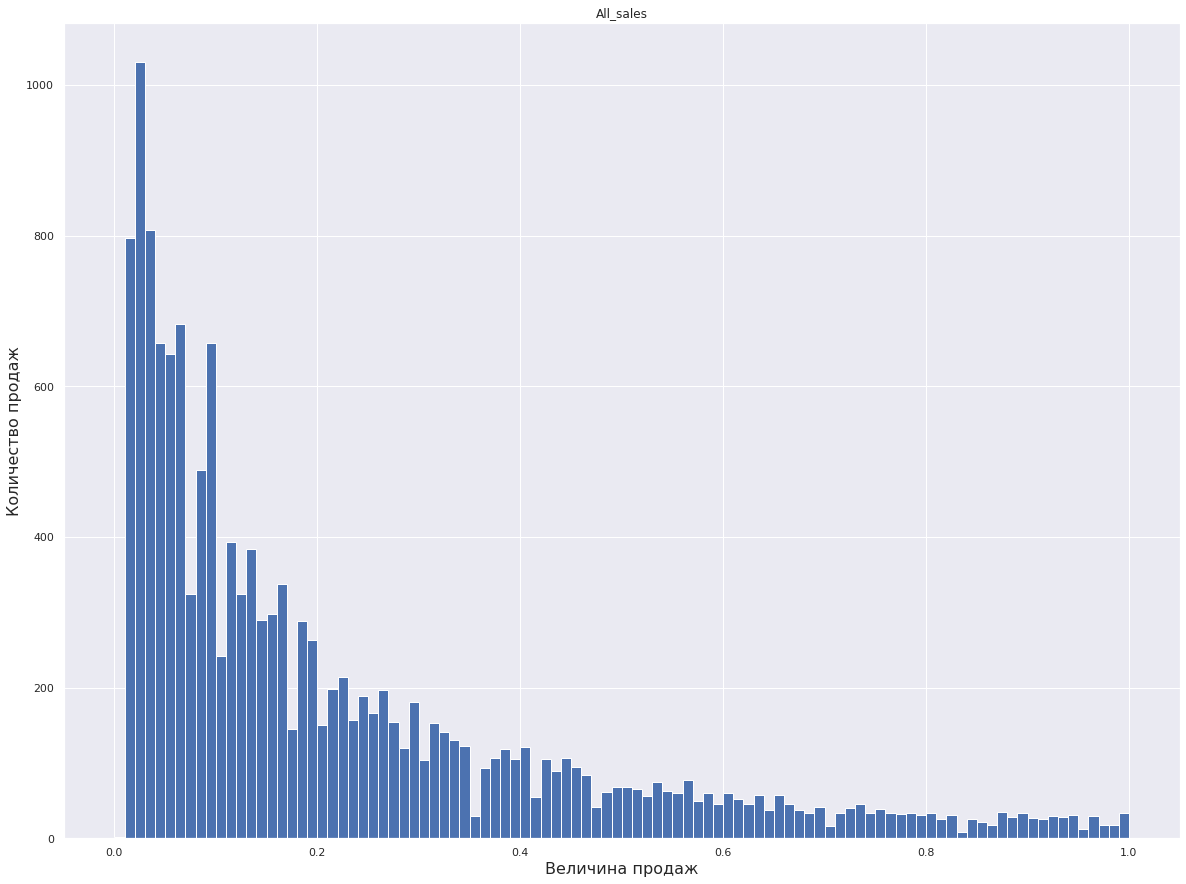

In [43]:
data.hist('All_sales', range=(0, 1), bins=100, figsize=(20, 15))
plt.xlabel(r'Величина продаж', fontsize=16)
plt.ylabel(r'Количество продаж', fontsize=16)

#### Колонки с продажами

In [44]:
data_filtered = data[data['User_Score'] != 66666]
data_filtered['User_Score'].describe()

count   7590.00
mean      71.25
std       15.00
min        0.00
25%       64.00
50%       75.00
75%       82.00
max       97.00
Name: User_Score, dtype: float64

In [45]:
data_filtered = data[data['Critic_Score'] != 66666]
data_filtered['Critic_Score'].describe()

count   8137.00
mean      68.97
std       13.94
min       13.00
25%       60.00
50%       71.00
75%       79.00
max       98.00
Name: Critic_Score, dtype: float64

### Проверка и вывод

#### Проверка

In [46]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,All_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,66666,66666,No_Rate,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,66666,66666,No_Rate,31.38


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16713 non-null  int64  
 3   Genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     16713 non-null  int64  
 9   User_Score       16713 non-null  int64  
 10  Rating           16713 non-null  object 
 11  All_sales        16713 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.7+ MB


In [48]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,All_sales
count,16713.00,16713.00,16713.00,16713.00,16713.00,16713.00,16713.00,16713.00
mean,3047.20,0.26,0.15,0.08,0.05,34242.14,36422.83,0.53
std,8137.13,0.81,0.50,0.31,0.19,33288.02,33158.00,1.55
min,1980.00,0.00,0.00,0.00,0.00,13.00,0.00,0.00
25%,2003.00,0.00,0.00,0.00,0.00,71.00,76.00,0.06
50%,2008.00,0.08,0.02,0.00,0.01,66666.00,66666.00,0.17
75%,2011.00,0.24,0.11,0.04,0.03,66666.00,66666.00,0.47
max,66666.00,41.36,28.96,10.22,10.57,66666.00,66666.00,82.54


#### Приведение к нижнему регистру

Перед исследовательским анализом приведем названия всех колонок к нижнему регистру.

In [49]:
def lower_column(table):
    lower_column = []
    old_and_new_column = {}
    for i in table.columns:
        lower_column.append(i.lower())
        old_and_new_column[i] = i.lower()
    table.columns = lower_column
    return table, old_and_new_column

lower_column(data)
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
6615,K-ON! Houkago Live!!,PSP,2010,Misc,0.00,0.00,0.25,0.00,66666,66666,No_Rate,0.25
5101,EA Sports MMA,PS3,2010,Fighting,0.16,0.14,0.01,0.06,77,69,T,0.37
2342,Tiger Woods PGA Tour 12: The Masters,PS3,2011,Sports,0.52,0.25,0.00,0.11,80,73,E,0.88
16562,Outdoors Unleashed: Alaska 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,66666,66666,T,0.01
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,1997,Misc,0.00,0.00,0.22,0.00,66666,66666,No_Rate,0.22


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b>Оптимальнее будет такой код 
        
        data.columns = data.columns.str.lower()

<div class="alert alert-info">
<b>Точно, согласен, намного проще! Если не против, оставлю свой вариант, чтобы осталось в памяти)</b> 
</div>

#### Вывод

В изначальных данных наблюдались пропуски, неявные дубликаты в колонке rating, неудобный для работы тип данных, аномалии и выбросы в некоторых колонках.

Заглушки установлены в столбцах year_of_release, critic_score, user_score.

Привели названия колонок к нижнему регистру.

Основной массив данных целостный. Критических замечаний нет.

После проведения предобработки осталось 16713 строки из 16715, вполне достаточно для проведения полноценного анализа.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отличная работа! Молодец) 

## Исследовательский анализ данных

### Количество игр по годам выпуска

In [50]:
data['year_of_release'].value_counts().sort_values(ascending=False)

2008     1427
2009     1426
2010     1255
2007     1197
2011     1136
2006     1006
2005      939
2002      829
2003      775
2004      762
2012      653
2015      606
2014      581
2013      544
2016      502
2001      482
1998      379
2000      350
1999      338
1997      289
66666     269
1996      263
1995      219
1994      121
1993       60
1981       46
1992       43
1991       41
1982       36
1986       21
1989       17
1983       17
1990       16
1987       16
1988       15
1985       14
1984       14
1980        9
Name: year_of_release, dtype: int64

Text(0, 0.5, 'Количество игр')

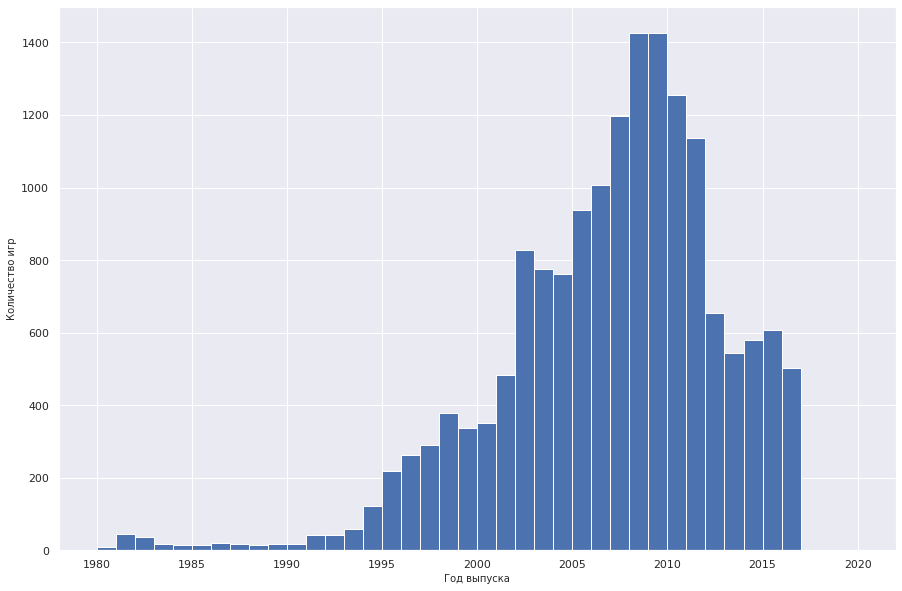

In [51]:
data['year_of_release'].hist(range=(1980, 2020), bins=40, figsize=(15, 10))
plt.xlabel(r'Год выпуска', fontsize=10)
plt.ylabel(r'Количество игр', fontsize=10)

До 1994 года выпускалось менее 100 игр в год, эти данные можно отбросить

Text(0, 0.5, 'Количество игр')

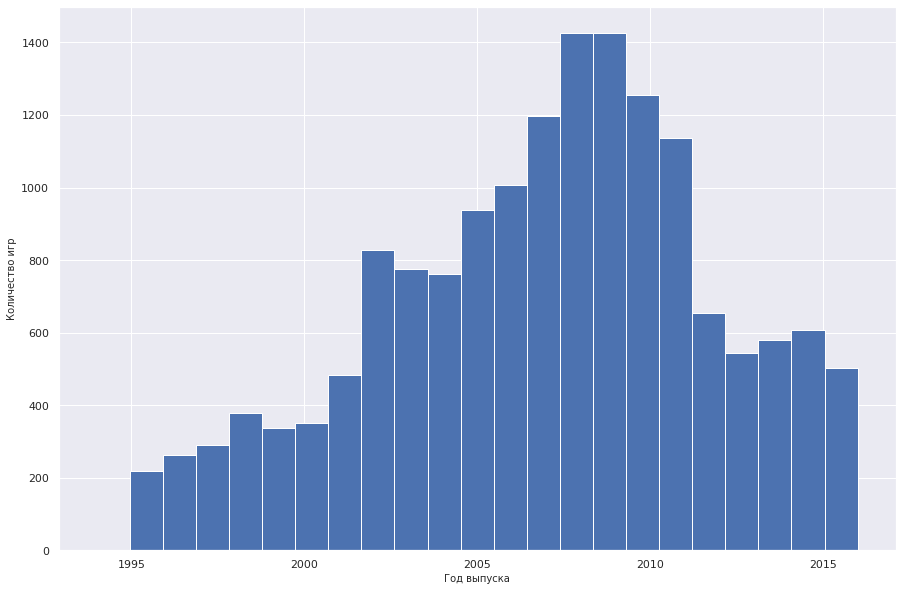

In [52]:
data = data.query('year_of_release > 1994')
data['year_of_release'].hist(range=(1994, 2016), bins=23, figsize=(15, 10))
plt.xlabel(r'Год выпуска', fontsize=10)
plt.ylabel(r'Количество игр', fontsize=10)

In [53]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,66666,66666,No_Rate,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,85,E,29.80


#### Вывод

С момента своего появления игровая отрасль показывала стабильный рост, выйдя к 2008-2009 году на пиковые значения по числу релизов, но после все еще высоких показателей в 2010 и 2011 годах, в 2012 году случился резкий спад, который продолжился вплоть до конца исследуемого периода.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Хорошечно, только давай подпишем оси и названи заголовка у графиков?) 

<div class="alert alert-info">
<b>Поправил</b> 
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> А заголовки?)

### Продажи игр по платформам

<AxesSubplot:xlabel='Платформа', ylabel='Количество продаж, млн копий'>

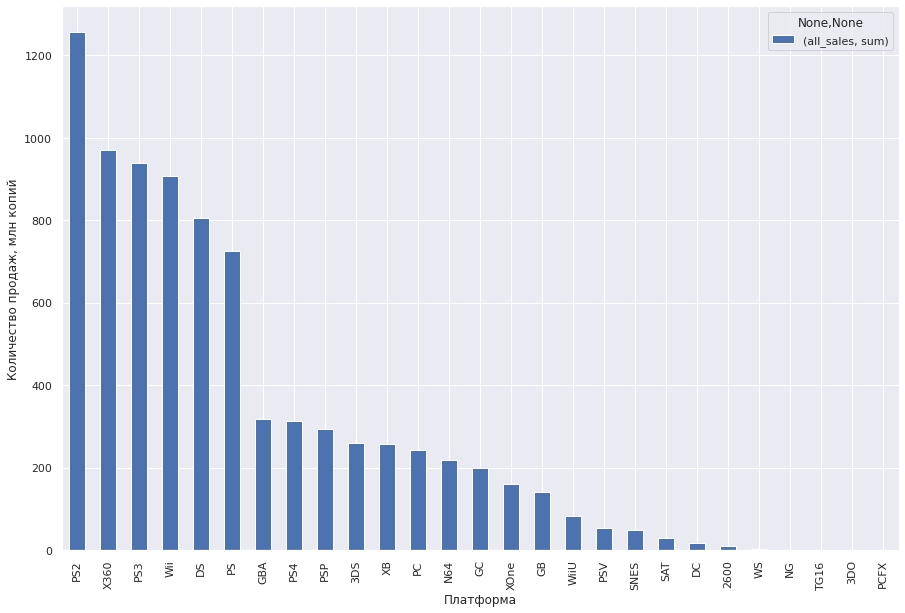

In [54]:
data.groupby(
    ['platform']).agg({'all_sales':['sum']}).sort_values(
    by = ('all_sales', 'sum'), ascending=False).plot(
    xlabel='Платформа', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10)
)

In [55]:
data.groupby(
    ['platform']).agg({'all_sales':['sum']}).reset_index().sort_values(
    by = ('all_sales', 'sum'), ascending=False)[0:6]

,platform,all_sales
,,sum
13,PS2,1255.77
24,X360,971.42
14,PS3,939.65
22,Wii,907.51
4,DS,806.10
12,PS,724.83


На графике видно, что лидируют по продажам игр 6 платформ, возьмем их для анализа

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Топ платформ определен верно) 

<AxesSubplot:xlabel='Год выпуска', ylabel='Количество продаж, млн копий'>

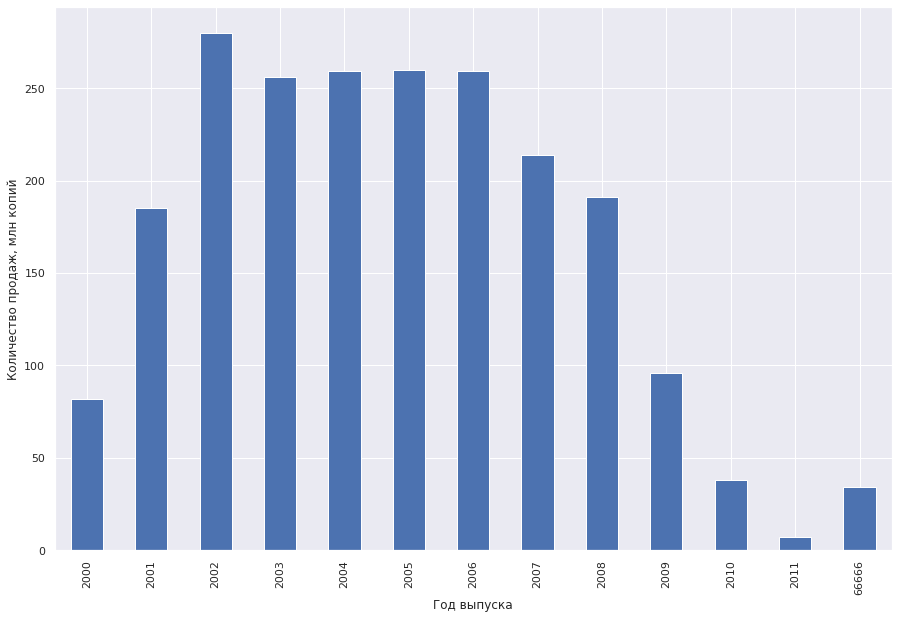

In [56]:
data.query(
    'platform == "PS2"').groupby(
    'year_of_release')['platform'].count().plot(
    xlabel='Год выпуска', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10)
)

Время 'жизни' платформы PS2 - 12 лет.
Высокую популярность (более 50 млн копий проданных игр в год) имела 10 лет с 2000 по 2009 годы.

<AxesSubplot:xlabel='Год выпуска', ylabel='Количество продаж, млн копий'>

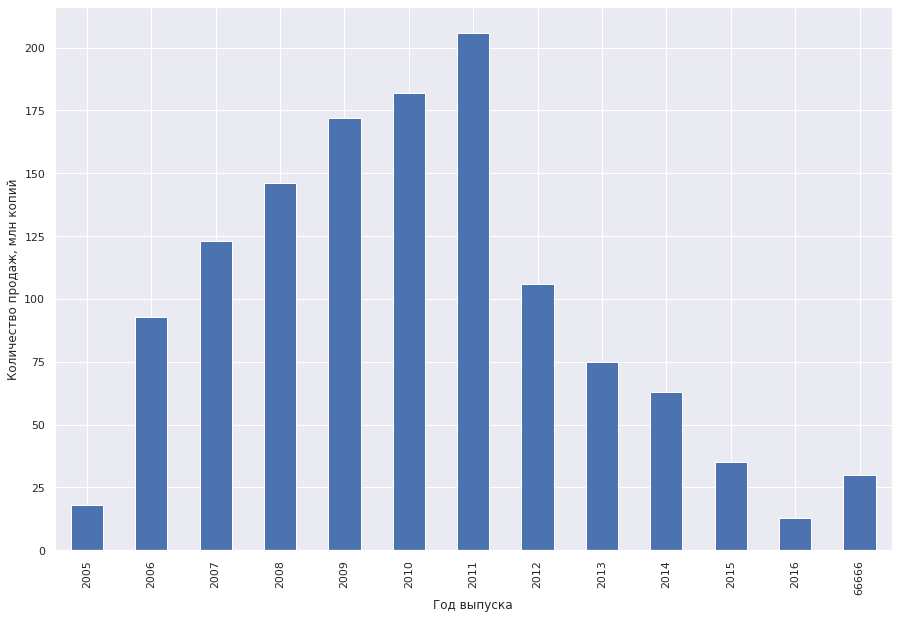

In [57]:
data.query(
    'platform == "X360"').groupby(
    'year_of_release')['platform'].count().plot(
    xlabel='Год выпуска', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10)
)

Время 'жизни' платформы X360 - 12 лет (на конец имеющегося датасета).
Высокую популярность имела 9 лет с 2006 по 2014 годы.

<AxesSubplot:xlabel='Год выпуска', ylabel='Количество продаж, млн копий'>

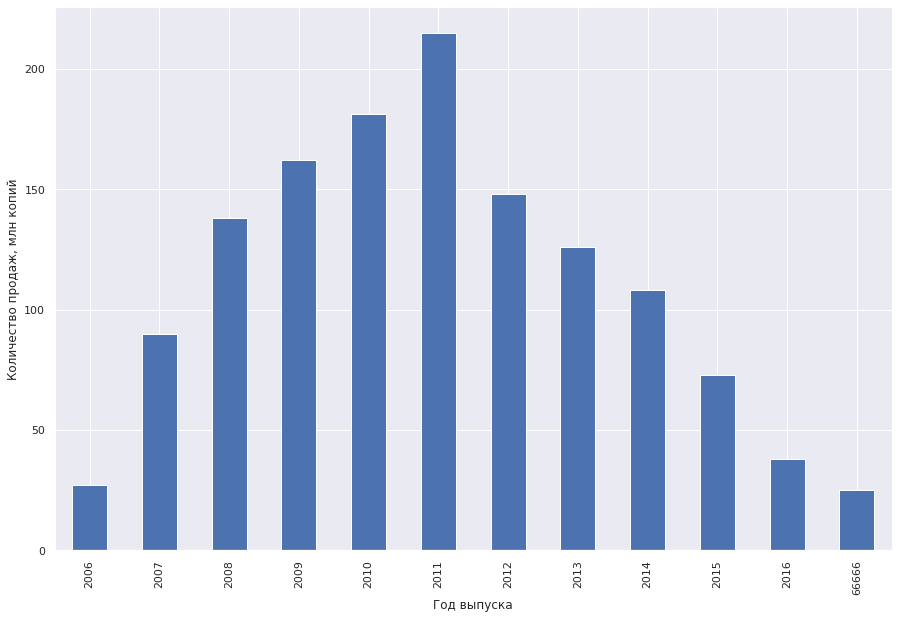

In [58]:
data.query(
    'platform == "PS3"').groupby(
    'year_of_release')['platform'].count().plot(
    xlabel='Год выпуска', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10)
)

Время 'жизни' платформы PS3 - 11 лет (на конец имеющегося датасета).
Высокую популярность имела 9 лет с 2007 по 2015 годы.

<AxesSubplot:xlabel='Год выпуска', ylabel='Количество продаж, млн копий'>

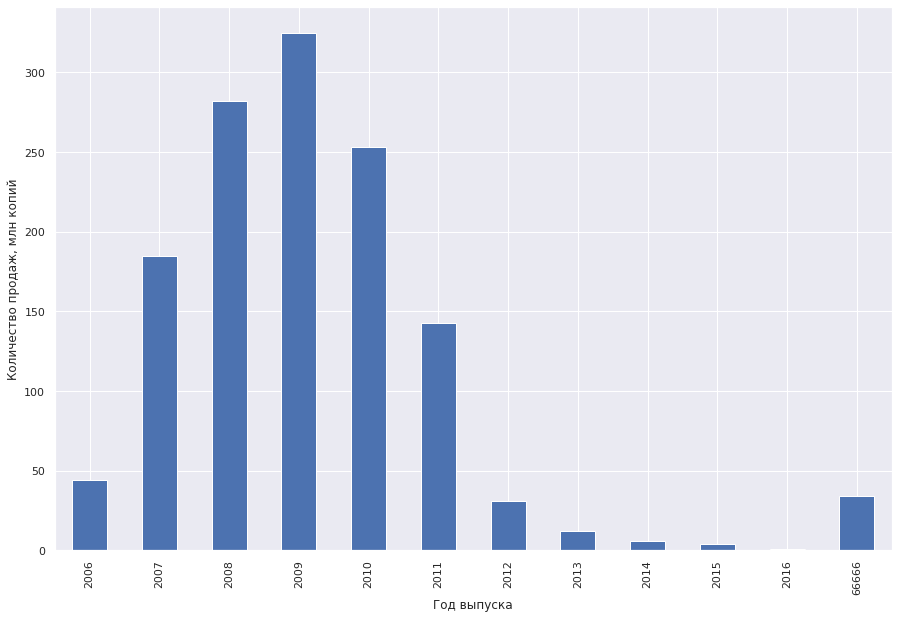

In [59]:
data.query(
    'platform == "Wii"').groupby(
    'year_of_release')['platform'].count().plot(
    xlabel='Год выпуска', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10)
)

Время 'жизни' платформы Wii - 11 лет (на конец имеющегося датасета).
Высокую популярность имела 5 лет с 2007 по 2011 годы.

<AxesSubplot:xlabel='Год выпуска', ylabel='Количество продаж, млн копий'>

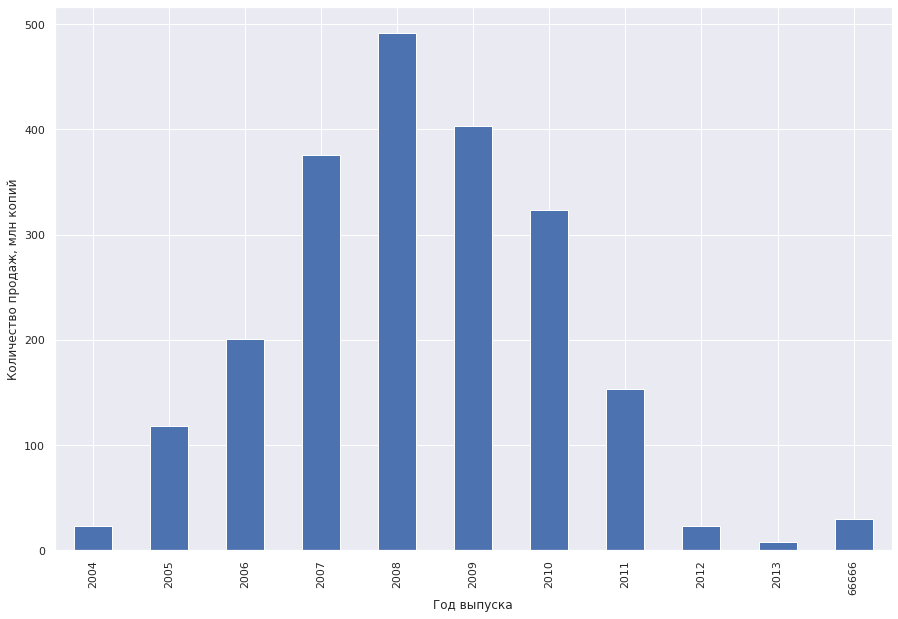

In [60]:
data.query(
    'platform == "DS"').groupby(
    'year_of_release')['platform'].count().plot(
    xlabel='Год выпуска', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10)
)

Время 'жизни' платформы DS - 10 лет.
Высокую популярность имела 7 лет с 2005 по 2011 годы.

<AxesSubplot:xlabel='Год выпуска', ylabel='Количество продаж, млн копий'>

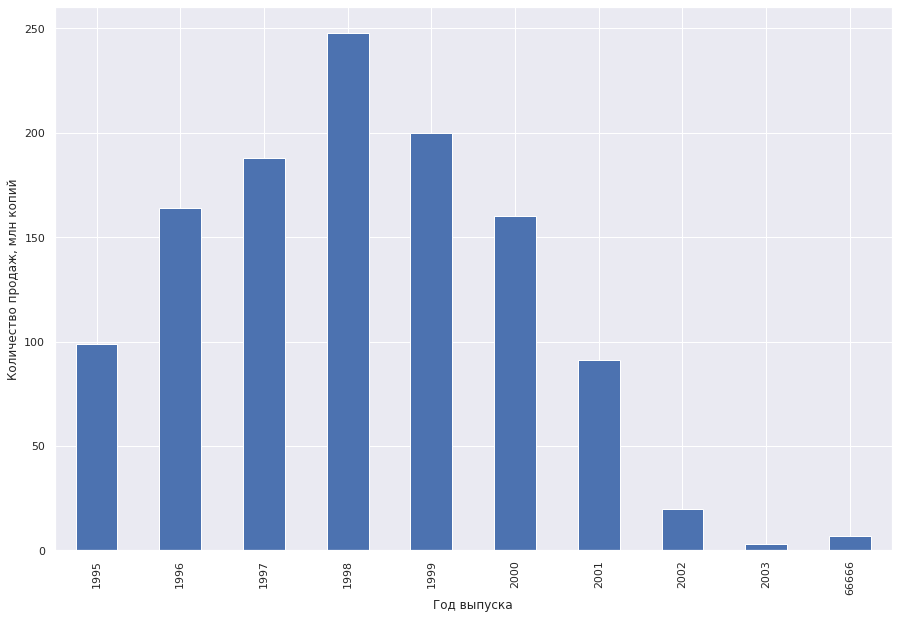

In [61]:
data.query(
    'platform == "PS"').groupby(
    'year_of_release')['platform'].count().plot(
    xlabel='Год выпуска', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10), 
)

Релиз платформы состоялся в 1994 году.
Время 'жизни' платформы PS - 10 лет.
Высокую популярность имела 7 лет с 1995 по 2001 годы.

In [62]:
lifetime = [12, 12, 11, 11, 10, 10]
top_popularity = [10, 9, 9, 5, 7, 7]
lifetime_mean = sum(lifetime) / len(lifetime)
top_popularity_mean = sum(top_popularity) / len(top_popularity)
print(f'Среднее время существования игровой платформы {lifetime_mean}')
print(f'Среднее время высокой популярности игровой платформы {top_popularity_mean}')

Среднее время существования игровой платформы 11.0
Среднее время высокой популярности игровой платформы 7.833333333333333


#### Вывод

Среднее время существования игровой платформы - около 11 лет, высокие продажи игр можно ожидать 7-8 лет.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Согласен с тобой, за 10 лет продажи на любой платформе падают до 0

### Прогноз продаж игр на 2017 год

Text(0, 0.5, 'Количество игр')

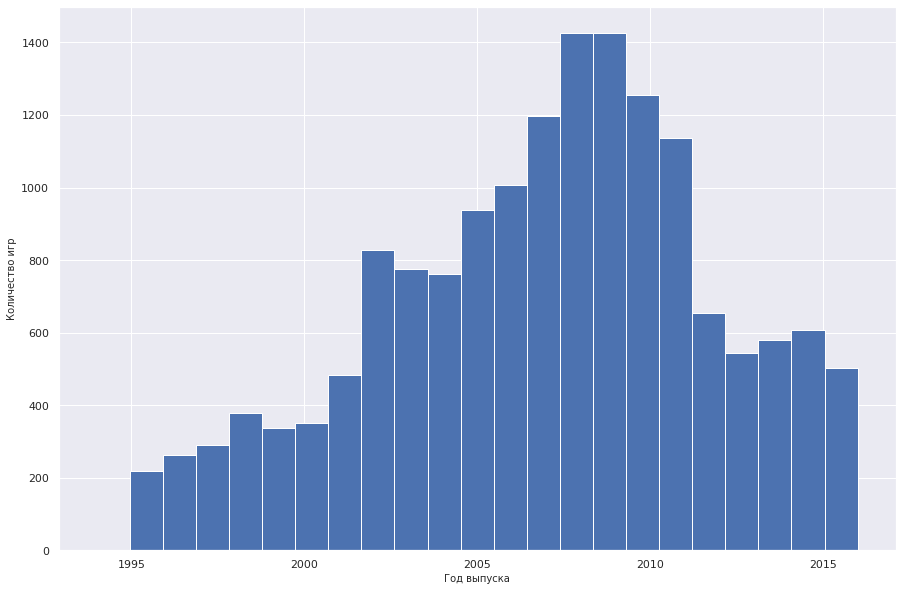

In [63]:
data['year_of_release'].hist(range=(1994, 2016), bins=23, figsize=(15, 10))
plt.xlabel(r'Год выпуска', fontsize=10)
plt.ylabel(r'Количество игр', fontsize=10)

Для построения прогноза успешности игровых консолей в 2017 году возьмем период с 2012 по 2016 годы: в это время уровень релизов держался на примерно одном ежегодном уровне.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b>Немного большеват актуальный период. Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит

<AxesSubplot:ylabel='Год выпуска'>

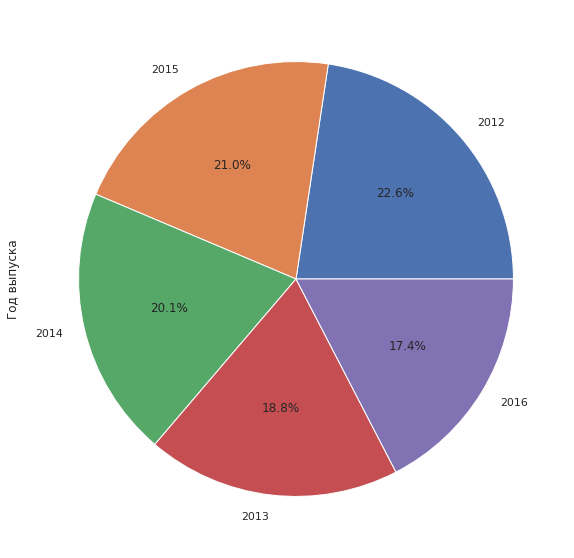

In [64]:
data_filtered = data.query(('year_of_release > 2011 & year_of_release != 66666'))
data_filtered['year_of_release'].value_counts().plot(ylabel='Год выпуска', kind='pie', figsize=(15, 10), autopct='%1.1f%%')

<AxesSubplot:xlabel='Платформа', ylabel='Количество продаж'>

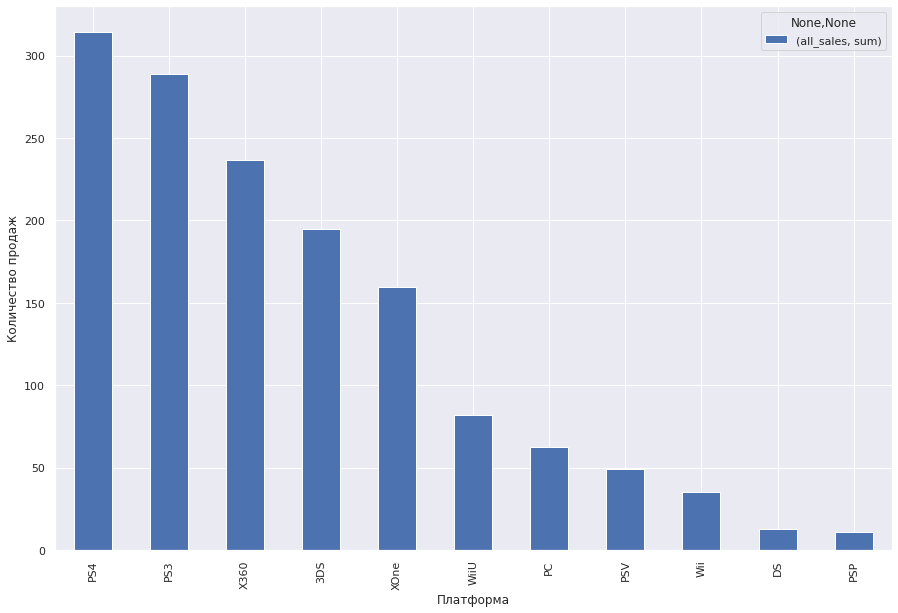

In [65]:
data_filtered.groupby(
    ['platform']).agg({'all_sales':['sum']}).sort_values(
    by = ('all_sales', 'sum'), ascending=False).plot(
    ylabel='Количество продаж', xlabel='Платформа', kind='bar', figsize=(15,10)
)

Лидирующую строчку по продажам за актуальный период занимает PS4, минимальными продажами отметились DS и PSP.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Окей) 

<AxesSubplot:xlabel='Платформа', ylabel='Количество продаж в 2012'>

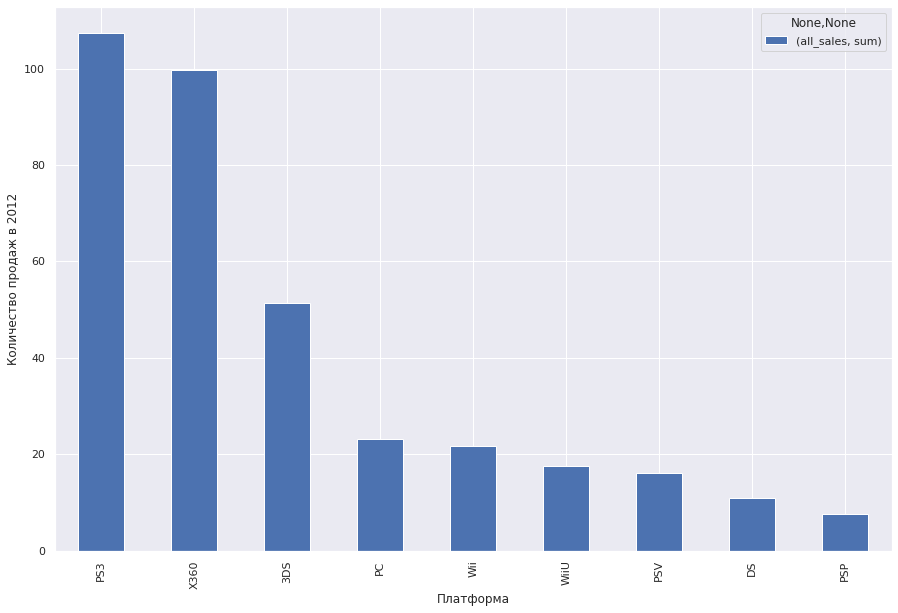

In [66]:
data_filtered.query('year_of_release == 2012').groupby(
    ['platform']).agg({'all_sales':['sum']}).sort_values(
    by = ('all_sales', 'sum'), ascending=False).plot(ylabel='Количество продаж в 2012', xlabel='Платформа', kind='bar', figsize=(15,10))

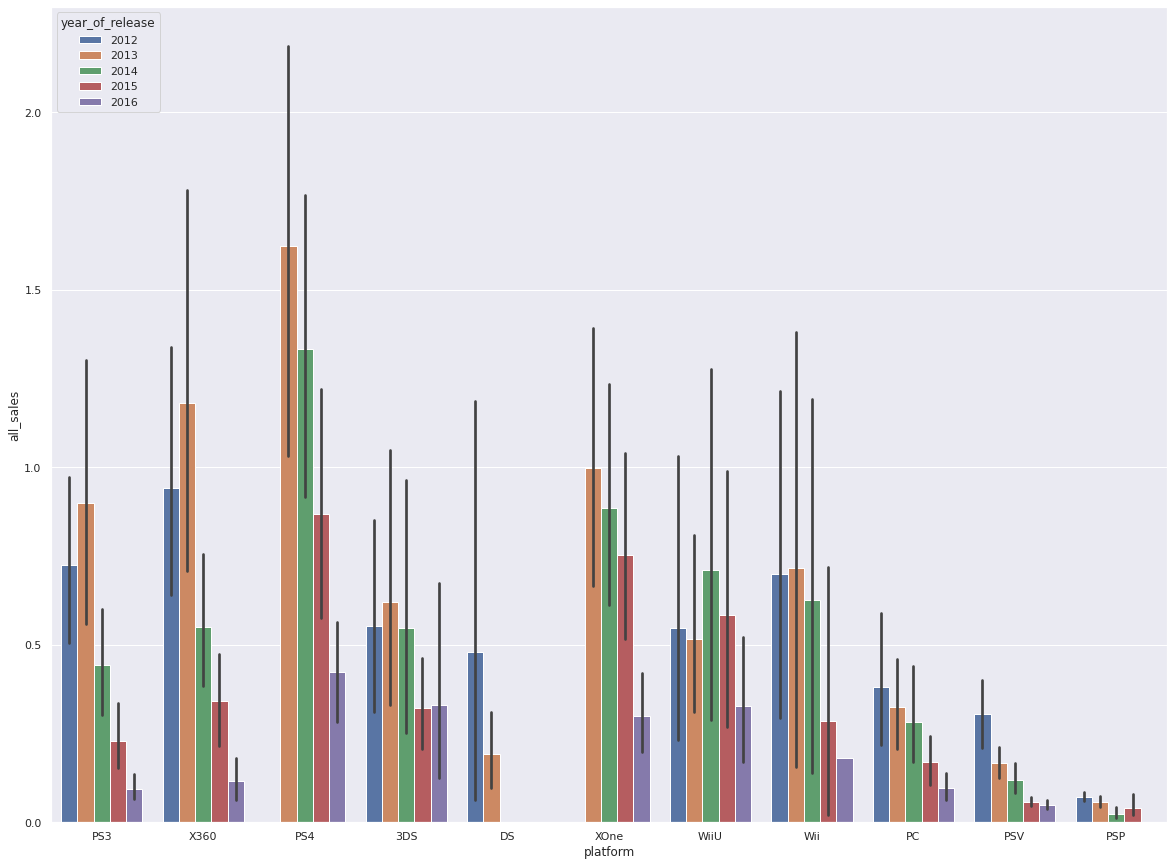

In [67]:
ax = sns.barplot(y='all_sales', x='platform', hue='year_of_release', data = data_filtered)
# plt.xlabel(r'Год выпуска', size=30)
# plt.ylabel(r'Количество игр', size='medium')

Однозначно можно вычеркнуть из списка перспективных DS и PSP - в 2016 году игры на них не выпускались, вряд ли что-то изменится и в 2017.

Релиз 2 топовых платформ (PS4 и XOne) состоялся только в ноябре 2013 года, для корректного анализа возьмем актуальный период, начиная с 2014. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Вот теперь полностью согласен!

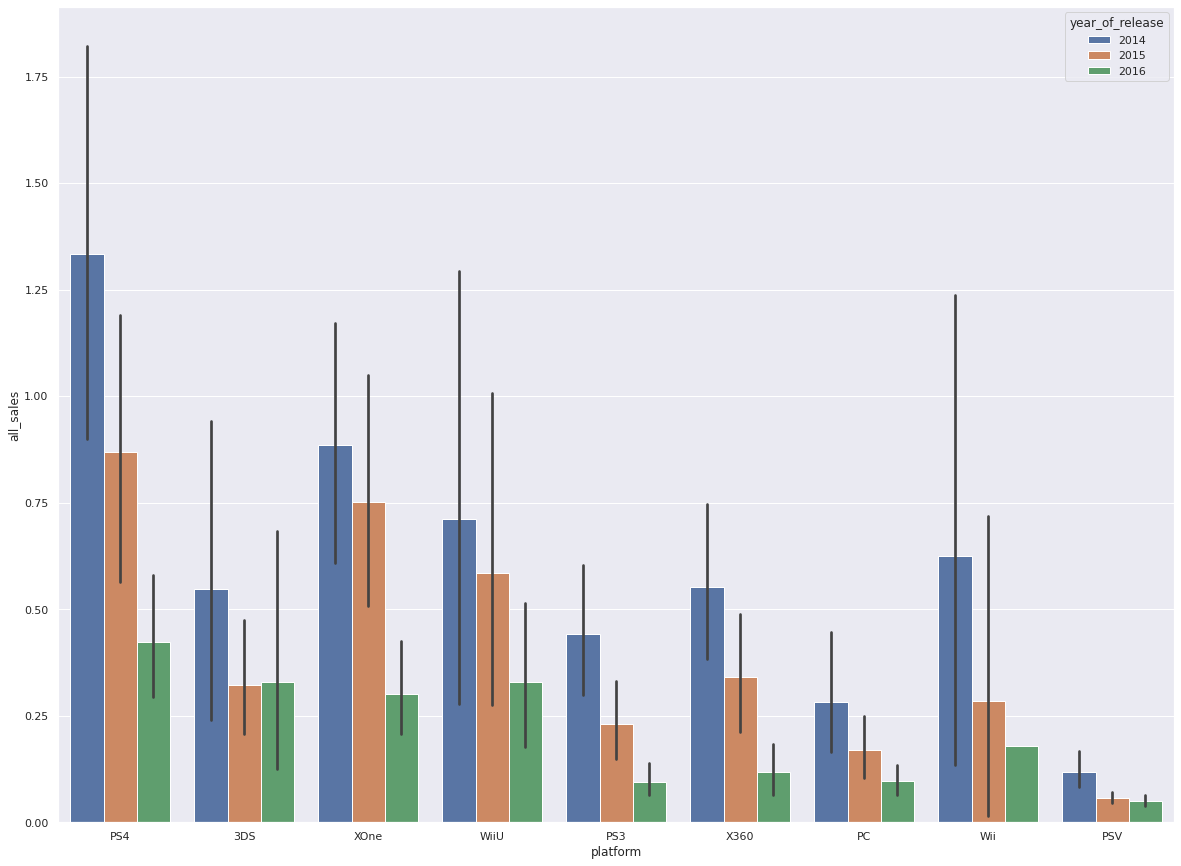

In [68]:
data_filtered = data_filtered.query('platform != "PSP" & platform != "DS" & year_of_release != 2012 & year_of_release != 2013')
ax = sns.barplot(y='all_sales', x='platform', hue='year_of_release', data = data_filtered)
# plt.rcParams['figure.figsize']=(50,50)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b>Можем немного увеличить подписи на осях?) 

<div class="alert alert-info">
<b>Вообще не понял, как это получилось. Каждый раз при запуске отображается по разному при одних и тех же параметрах, когда сдавал естественно все выглядело корректно, а так бы я сам ничего не разобрал:) Очень странно работает sns</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Бывает) Вот теперь хорошечно 

#### Вывод

Продажи практически всех вышепредставленных платформ падают в рамках актуального периода. Исходя из графика можно сказать, что относительно стабильно в 2016 году себя чувствует только Nintendo 3DS и на них можно делать ставку. Также по умолчанию можно рассчитывать на более свежие версии своих линеек XOne, PS4 и WiiU, хотя X360 и Wii, несмотря на их солидный 'возраст' до сих пор показывают отличный результат. 
    
Нельзя не отметить, что 3DS - портативная консоль и не является прямым конкурентом 'домашним' консолям, к каким относятся все остальные.
    
Стабильное падение PC в целом удивляет, но пользователей стационарных компьютеров, несмотря на тенденцию всеобщего перехода на консоли, еще долгое время будет весьма достаточно, вопрос продаваемости игр на PC заключается в сложности обхода зашит и лицензий и дальнейшем распространении торрент трекеров.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Окей, молодец!

### Диаграмма размаха по глобальным продажам игр

(0.0, 1.0)

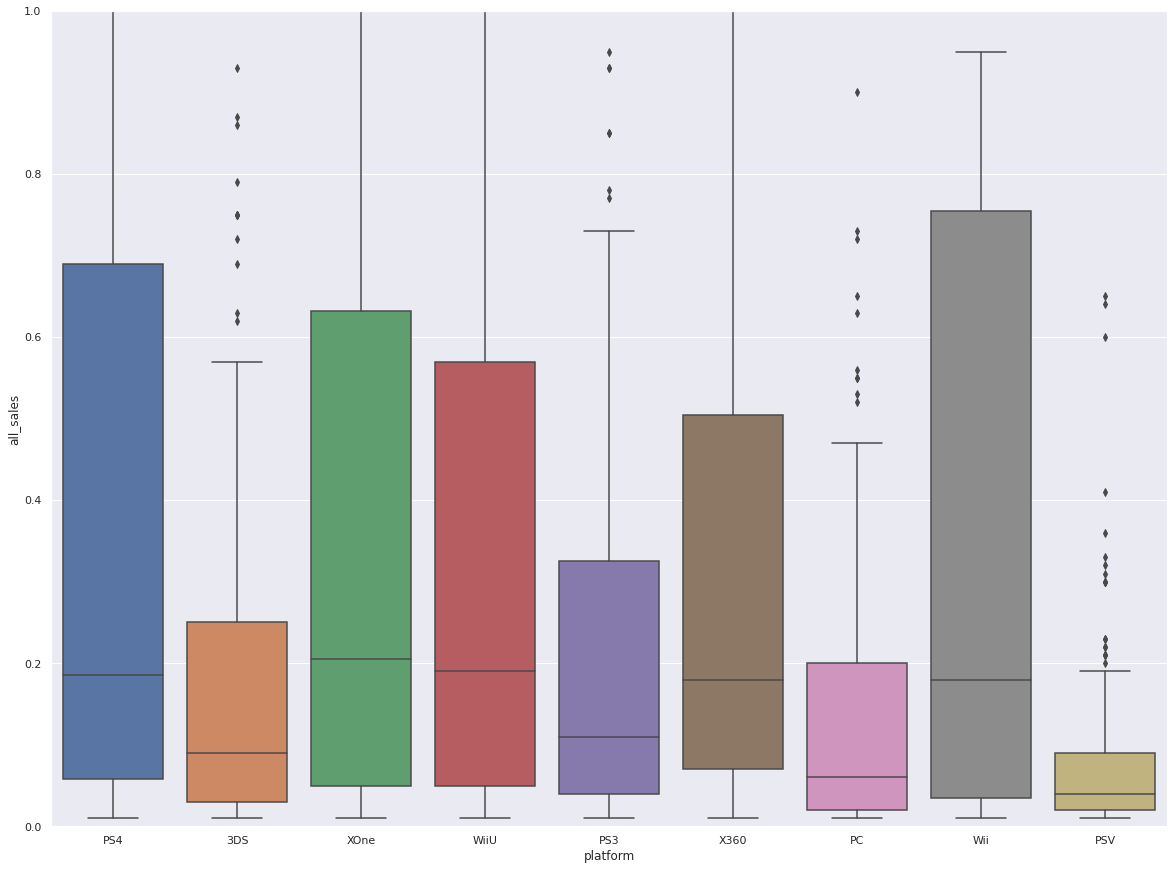

In [69]:
sns.boxplot(x = data_filtered['platform'], y = data_filtered['all_sales']) 
plt.ylim(0, 1)


(0.0, 2.5)

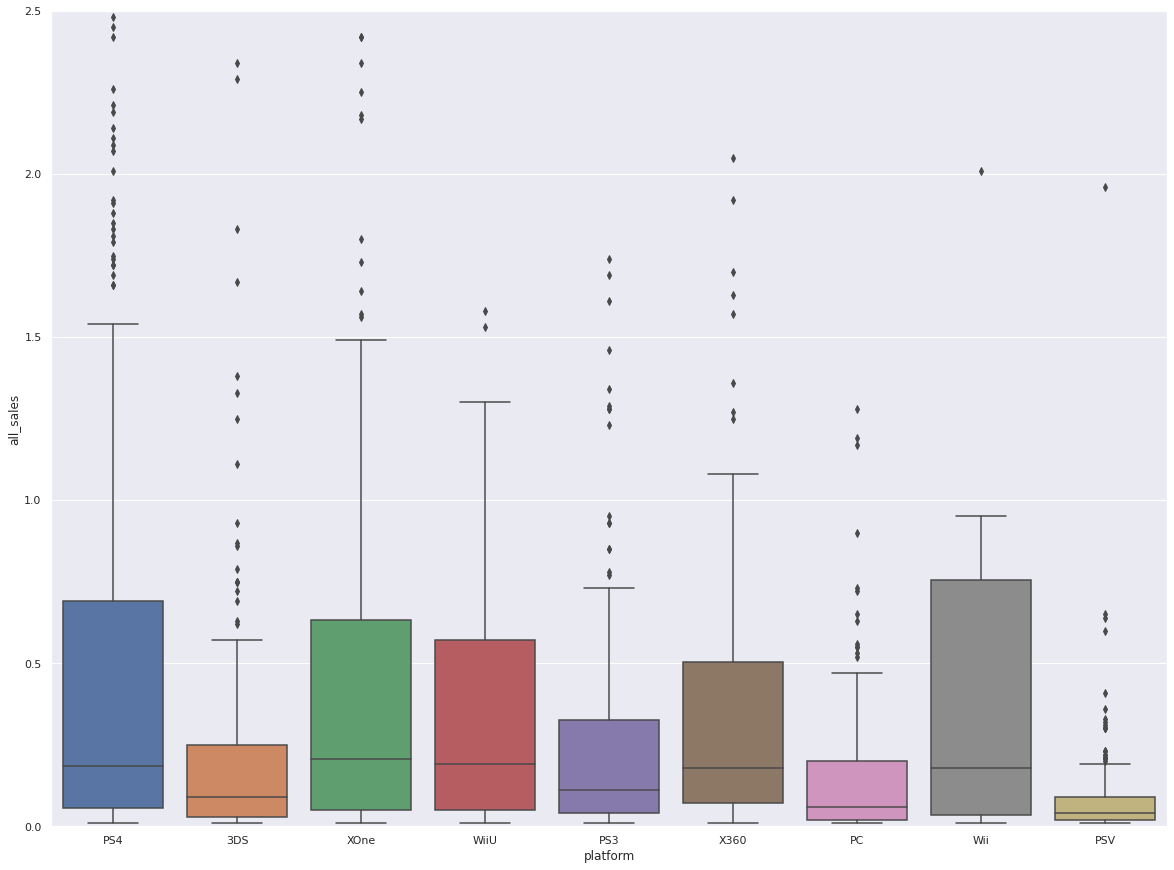

In [70]:
sns.boxplot(x = data_filtered['platform'], y = data_filtered['all_sales']) 
plt.ylim(0, 2.5)

#### Вывод

В топе находятся 5 'домашних' платформ, медианные значения которых практически равны: PS4, XOne, WiiU, X360 и Wii. У Wii и WiiU самый стабильный показатель продаж, практически нет выбросов, в то время как высокий показатель продаж остальных платформ достигается за счет отдельных релизов супер популярных игр и эксклюзивов.

При этом не стоит забывать, что из этих платформ PS4, XOne, WiiU - свежие версии своих линеек, вышедшие в 2012-2013 годах, в то время как X360 и Wii - 'старички', выпущенные в далеких 2005-2006 годах, но по прежнему актуальные.


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Тут давай тоже увеличим размер подписей на осях?) Практически ничего непонятно

<div class="alert alert-info">
<b>Все, кажется, врубился) Убрал где-то затерявшийся pc.Params и добавил set.sns в начале работы, но появились предупреждающие окна в 3.5.1 в графиках plot. Подскажи, плиз, на что ругается и как поправить)</b> 
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Для борьбы с предупреждениями могу посоветовать такой прием (импорт ставь в самом начале):
    
    import warnings

    warnings.filterwarnings("ignore")

### Влияние отзывов на продажи

#### Отзывы критиков

Для анализа возьмем консоль, чей нормальный размах оказался самым большим - PS4.

In [71]:
data_ps4 = data.query('platform == "PS4" & critic_score != 66666 & user_score != 66666')
data_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,43,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,57,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,50,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,65,M,7.17


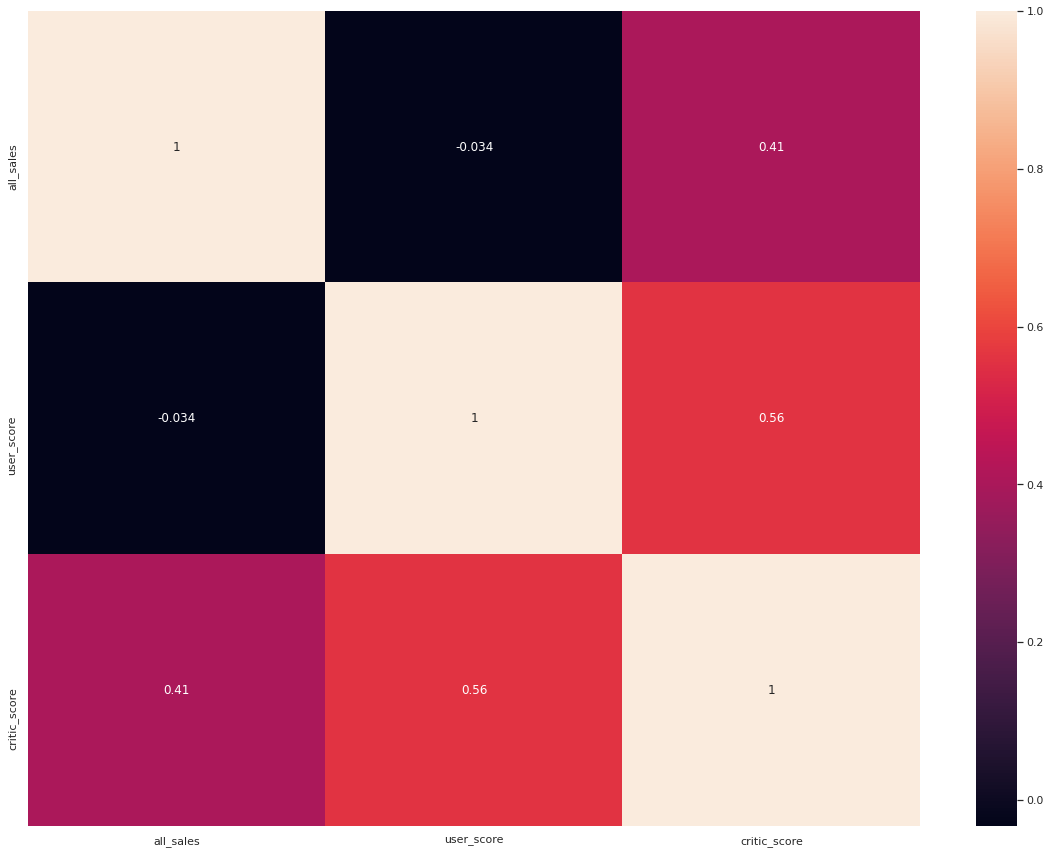

In [72]:
sns.heatmap(data_ps4.loc[:,['all_sales', 'user_score', 'critic_score']].corr(),annot=True); 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

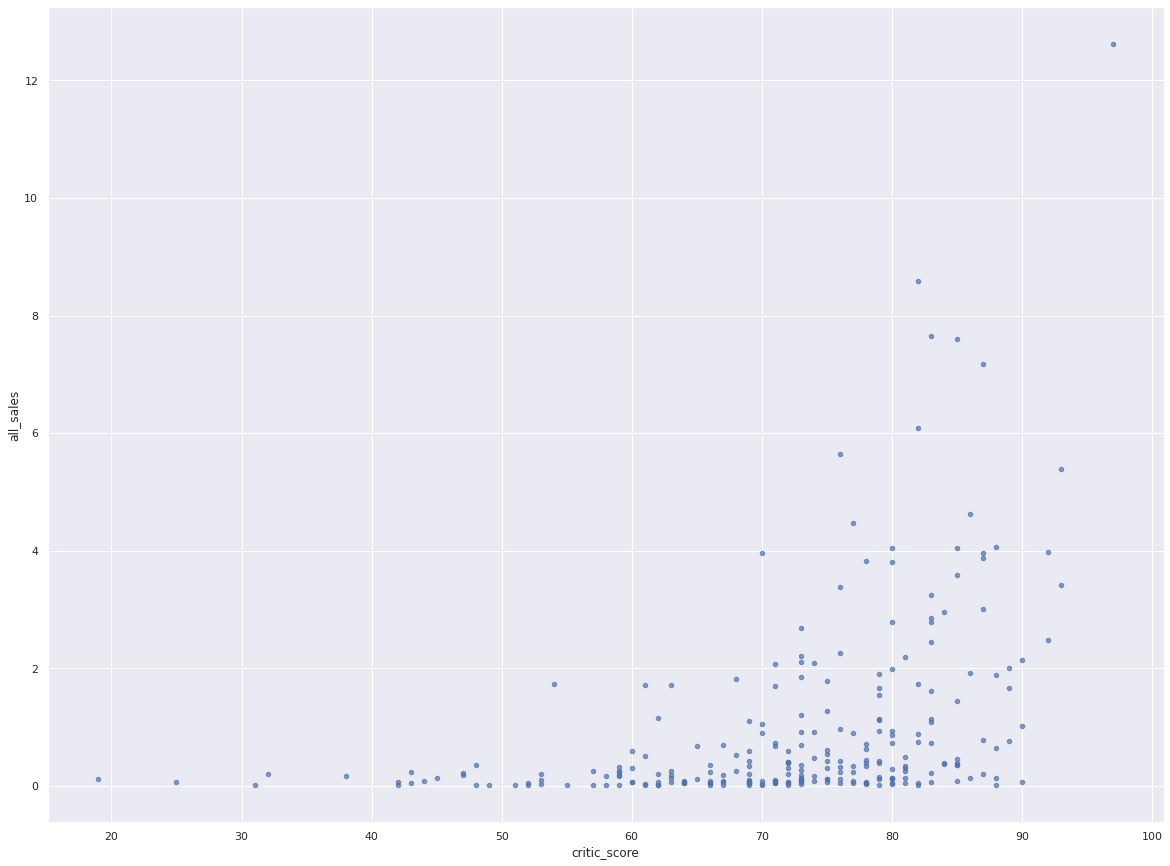

In [73]:
data_ps4.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.7, grid=True) 


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.40589480145836687

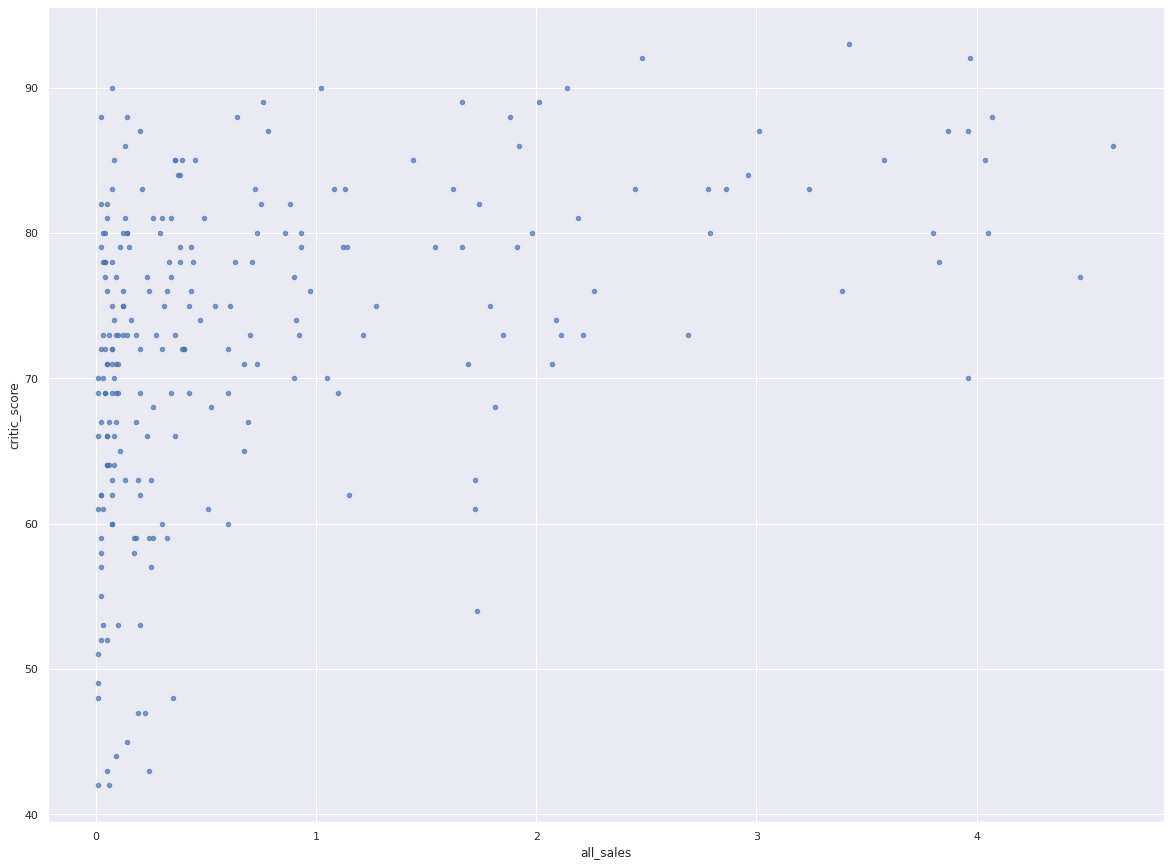

In [74]:
data_ps4.query('all_sales < 5 & critic_score > 40').plot(x='all_sales', y='critic_score', kind='scatter', alpha=0.7, grid=True) 
data_ps4['all_sales'].corr(data['critic_score'])

#### Отзывы пользователей

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

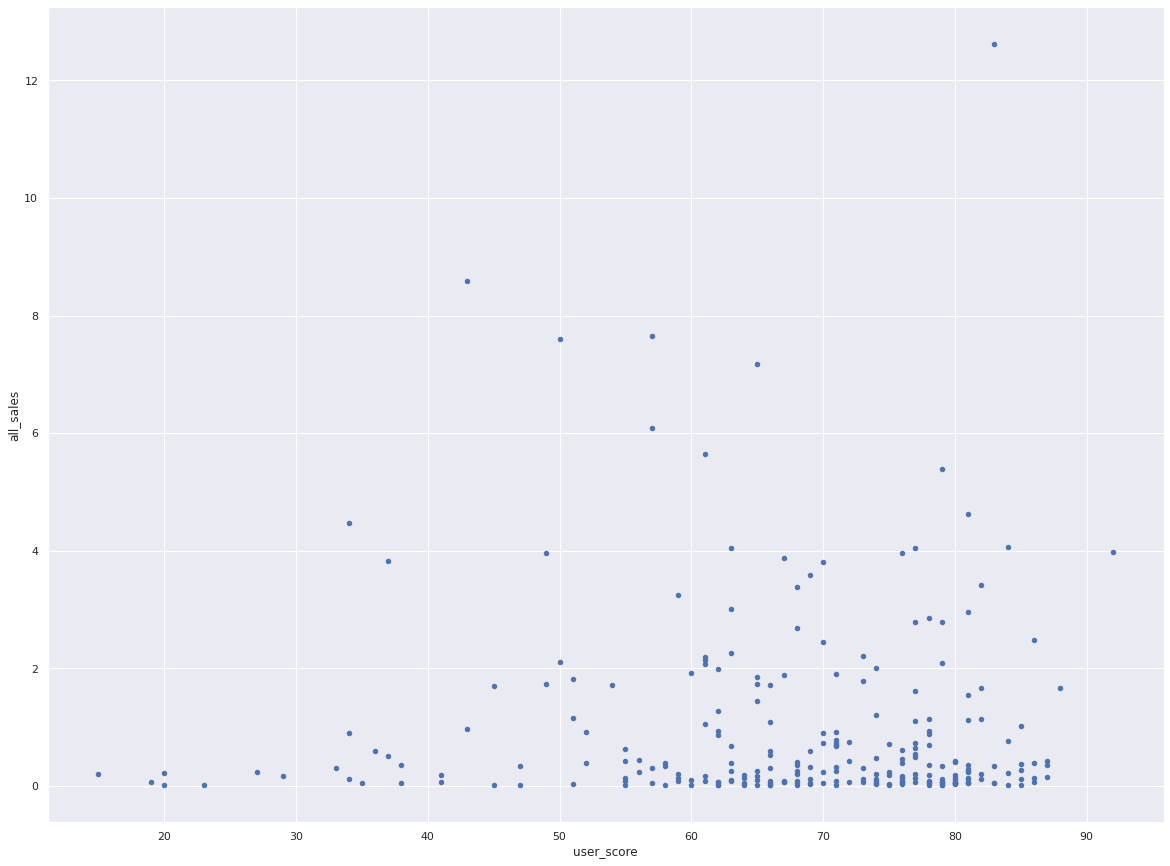

In [75]:
data_ps4.plot(x='user_score', y='all_sales', kind='scatter', grid=True) 


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


-0.03362497596528887

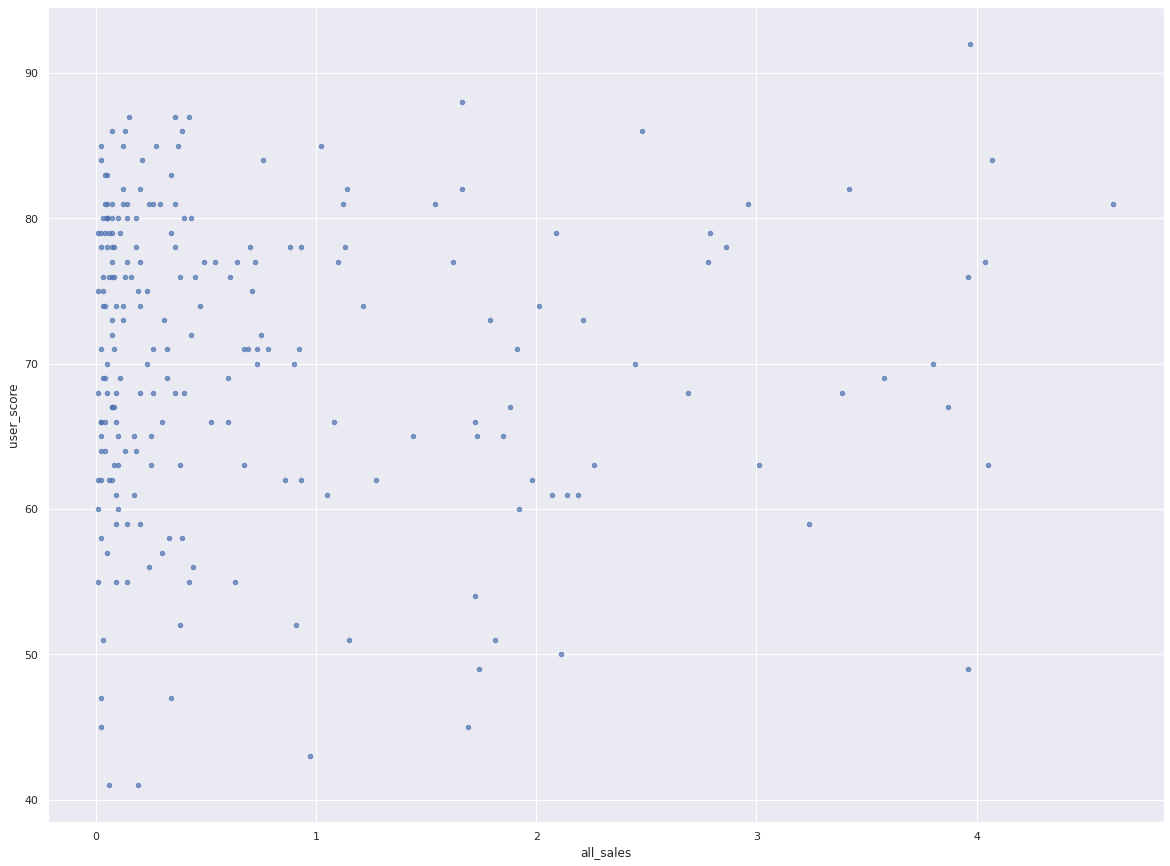

In [76]:
data_ps4.query('all_sales < 5 & user_score > 40').plot(x='all_sales', y='user_score', kind='scatter', alpha=0.7, grid=True) 
data_ps4['all_sales'].corr(data['user_score'])

#### Сравнение с другими платформами

Возьмем для сравнения прямого конкурента PS4 - XOne, и косвенного конкурента, портативную платформу 3DS.

In [77]:
data_xone = data.query('platform == "XOne" & critic_score != 66666 & user_score != 66666')
data_3ds = data.query('platform == "3DS" & critic_score != 66666 & user_score != 66666')
data_wii = data.query('platform == "Wii" & critic_score != 66666 & user_score != 66666')
data_pc = data.query('platform == "PC" & critic_score != 66666 & user_score != 66666')

In [78]:
data_xone['all_sales'].corr(data['critic_score'])

0.4104220356129637

In [79]:
data_xone['all_sales'].corr(data['user_score'])


-0.09400318326920865

У XOne примерно такая же история, чуть меньше корреляция с отзывами критиков и почти отсутствующая отрицательная(!) корреляция с отзывами пользователей.

In [80]:
data_3ds['all_sales'].corr(data['critic_score'])


0.3398243344453552

In [81]:
data_3ds['all_sales'].corr(data['user_score'])


0.2334027438079285

У 3DS картина другая, корреляция с отзывами критиков ненамного больше корреляции с отзывами пользователей, в сравнении с другими платформами.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Построим зависимости для данных платформ тоже?)

#### Вывод

Судя по данным по консоли PS4, между оценками критиков и продажами существет средневыраженная положительная корреляция. Нет ни одной игры с рейтингом ниже 50 и успешными продажами.
При этом корреляция фактически отсутствует между отзывами пользователей и продажами, что немного странно.

Для объяснения этого явления есть 3 предположения.

1. Критики получают игру на предрелизе и весомая часть продаж совершается до сбора данных о мнении пользователей.

2. Это может быть обусловлено дорелизной популярностью самих игр. Например, у известных серий игр есть уже фанатская база и изначально выше шансы быть купленными вне зависимости от пользовательских оценок, чем у новых малоизвестных игр и разработчиков. Эта версия подтверждается большим количеством продаж (выше 4 млн копий) игр со средним или даже ниже среднего рейтингом. Также это косвенно показывает количество игр с высоким рейтингом и малым числом проданных копий: небольшие инди игры часто имеют много положительных оценок, но при этом нацелены на небольшой пользовательский сегмент.

3. При просмотре в онлайн магазине игр с самой консоли пользовательский рейтинг не отображается да и мало кому хочется его писать с джойстика.

У XOne все плюс минус похоже на PS4.

А вот ситуация с 3DS другая. Там есть корреляция с отзывами как пользователей, так и критиков. Это как раз может быть одним из доказательств правдивости нашего 2 предположения. Портативные консоли в большей степени специализируются на платформерах, имеющих меньшую известность и узкий фанатский круг, чем  домашние консоли, в силу технического устройства.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b>Окей, молодец) Но графики едва заметны

<div class="alert alert-info">
<b>Вроде графики теперь в приличном виде. Немного не нравится матрица рассеяния, если будут советы по улучшению визуализации - буду благодарен)</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Я бы поменял местами оси и уменьшил масштаб графика, чтоб тендецию было видно лучше) 

### Продажи игр по жанрам

<AxesSubplot:xlabel='Жанр', ylabel='Количество игр'>

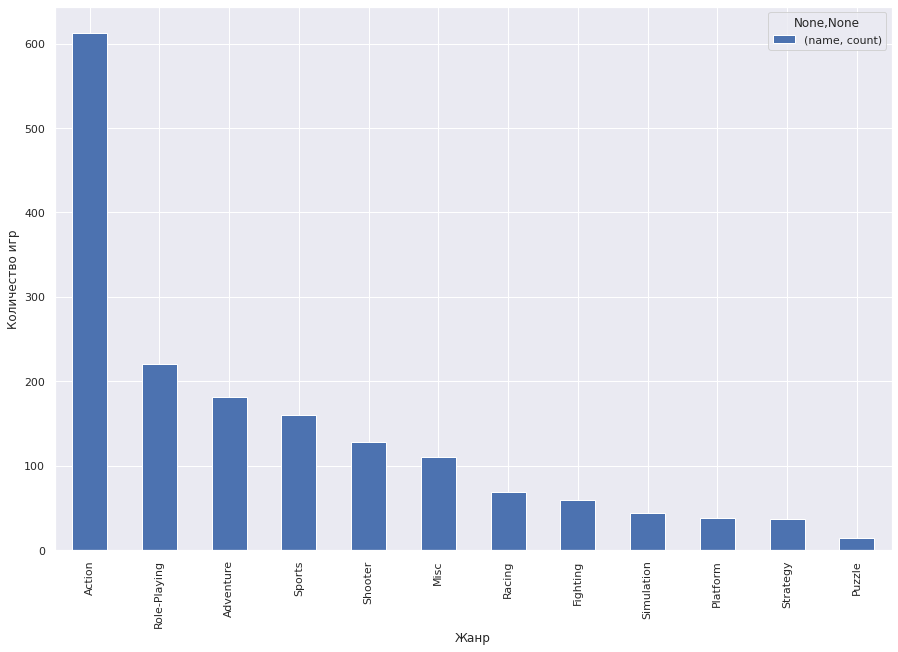

In [82]:
data_filtered.groupby(
    ['genre']).agg({'name':['count']}).sort_values(
    by = ('name', 'count'), ascending=False).plot(xlabel='Жанр', ylabel='Количество игр', kind='bar', figsize=(15,10))

<AxesSubplot:xlabel='Жанр', ylabel='Среднее количество продаж, млн копий'>

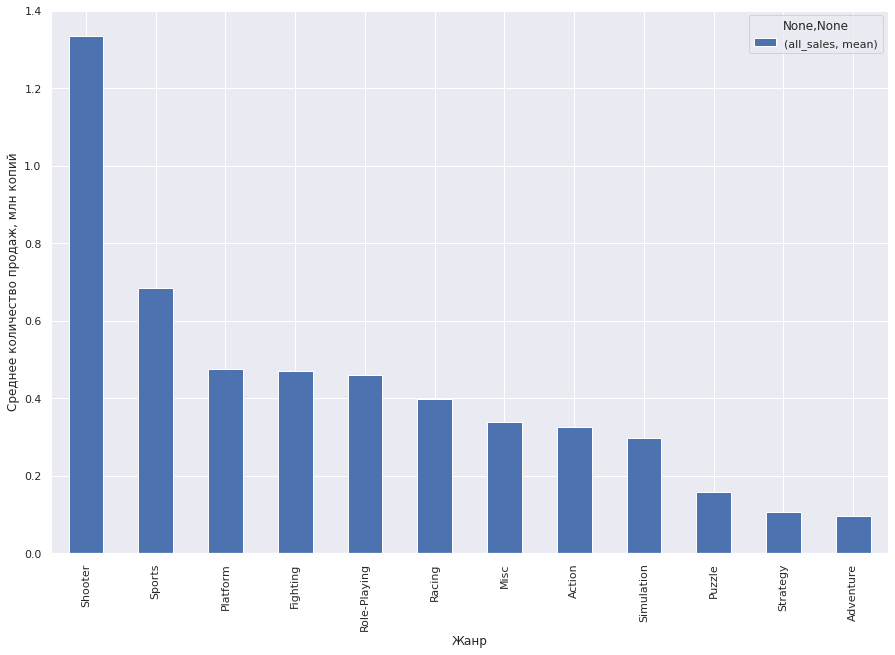

In [83]:
data_filtered.groupby(
    ['genre']).agg({'all_sales':['mean']}).sort_values(
    by = ('all_sales', 'mean'), ascending=False).plot(
    xlabel='Жанр', ylabel='Среднее количество продаж, млн копий', kind='bar', figsize=(15,10)
)

#### Вывод

Больше всего игр выпускается в жанре Action, но наиболее прибыльными при этом оказались шутеры, у которых почти в 5 раз меньше релизов.

Наименее популярные игры в жанре Puzzle, а наименее прибыльные - в жанре Adventure.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи

<div class="alert alert-info">
<b> Понял ошибку, спасибо! Поправил</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Исправлено) 

## Пользователи по регионам

### Популярные платформы

<AxesSubplot:xlabel='Платформа', ylabel='Количество продаж, млн копий'>

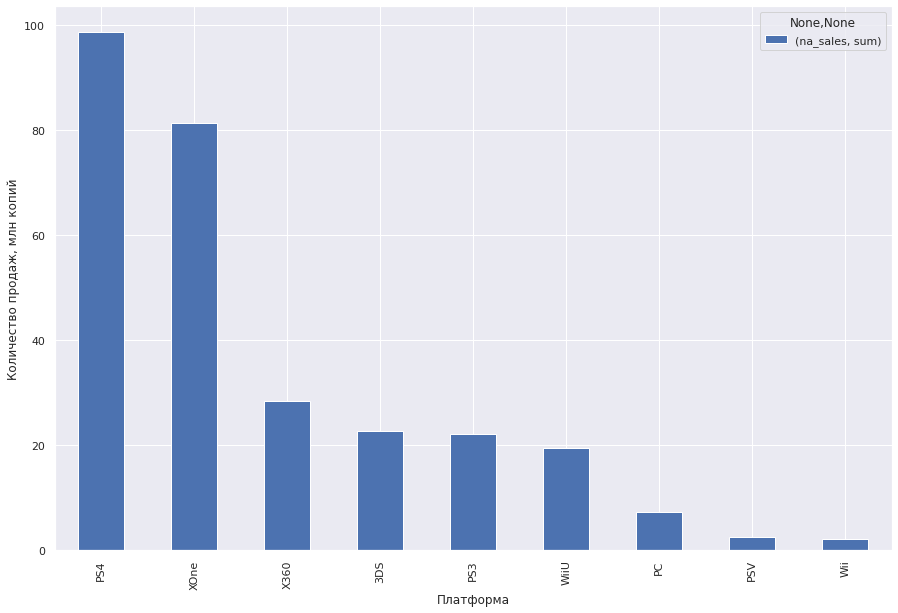

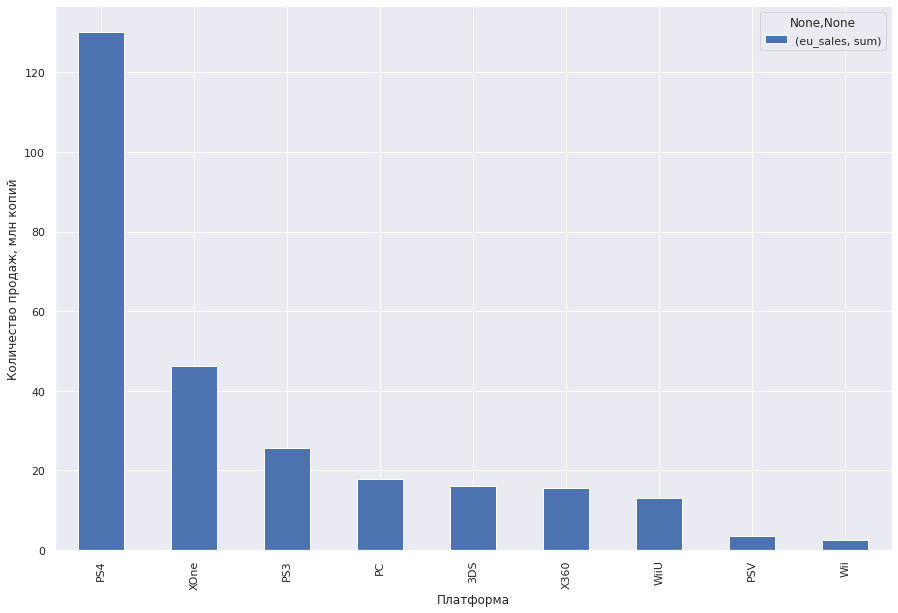

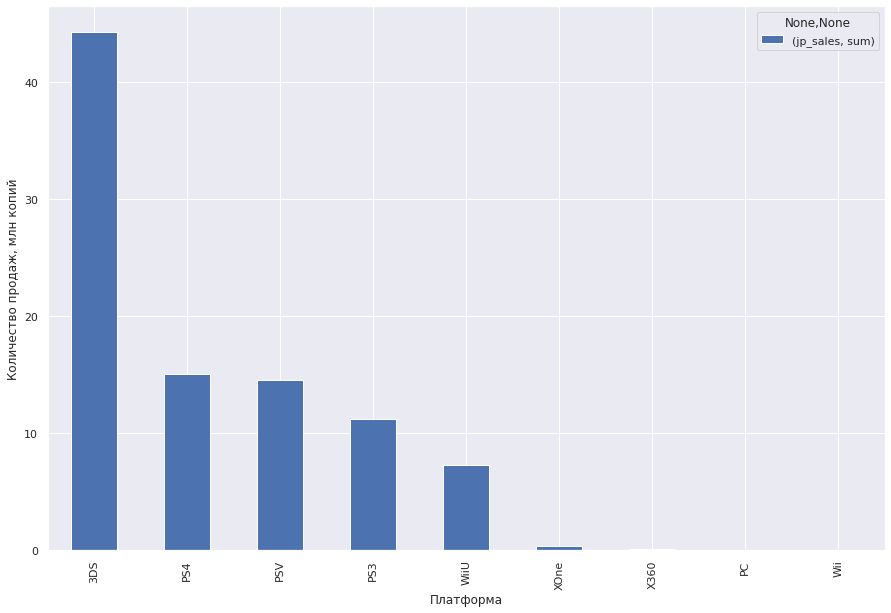

In [84]:
data_filtered.groupby(
    ['platform']).agg({'na_sales':['sum']}).sort_values(
    by = ('na_sales', 'sum'), ascending=False).plot(
    xlabel='Платформа', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10))
data_filtered.groupby(
    ['platform']).agg({'eu_sales':['sum']}).sort_values(
    by = ('eu_sales', 'sum'), ascending=False).plot(
    xlabel='Платформа', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10))
data_filtered.groupby(
    ['platform']).agg({'jp_sales':['sum']}).sort_values(
    by = ('jp_sales', 'sum'), ascending=False).plot(
    xlabel='Платформа', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10))

#### Вывод

Топ 5 консолей в Америке: PS4, XOne, X360, 3DS, PS3. Консоли PS4 и XOne лидируют с большим отрывом. 
Топ 5 консолей в Европе: PS4, XOne, PS3, PC, 3DS. Консоль PS4 лидирует с большим отрывом. 
Топ 5 консолей в Японии: 3DS, PS4, PSV, PS3, WiiU. Консоль 3DS лидирует с большим отрывом. 
       
В Европе и Америке преобладают продажи коипаний Sony и Microsoft, в Японии - Nintendo. 

Microsoft - американская компания, продажи ее XOne логично составляет высокую долю западного (и в особенности американского) рынка.

PS4 - самая раскрученная на момент исследования платформа, плюс продукция корпорации Sony давно нацелена на западные рынки, что обуславливает лидирующие позиции по продажам во всем мире.

Nintendo же после своего славного прошлого только пытается отнять долю европейско-американского рынка домашних консолей у этих 2 титанов, зато в производстве портативных консолей она впереди всех: как мы видим ее 3DS попала в топ 5 западных рынков, а в родной Японии вообще занимает неоспоримую первую строчку. 

Кстати, судя по данным исследования, японцы в принципе более заинтересованы в мобильных платформах: 3-ю строчку по продажам в Японии также занимает портативная консоль PSV.


### Популярные жанры

<AxesSubplot:xlabel='Жанр', ylabel='Количество продаж, млн копий'>

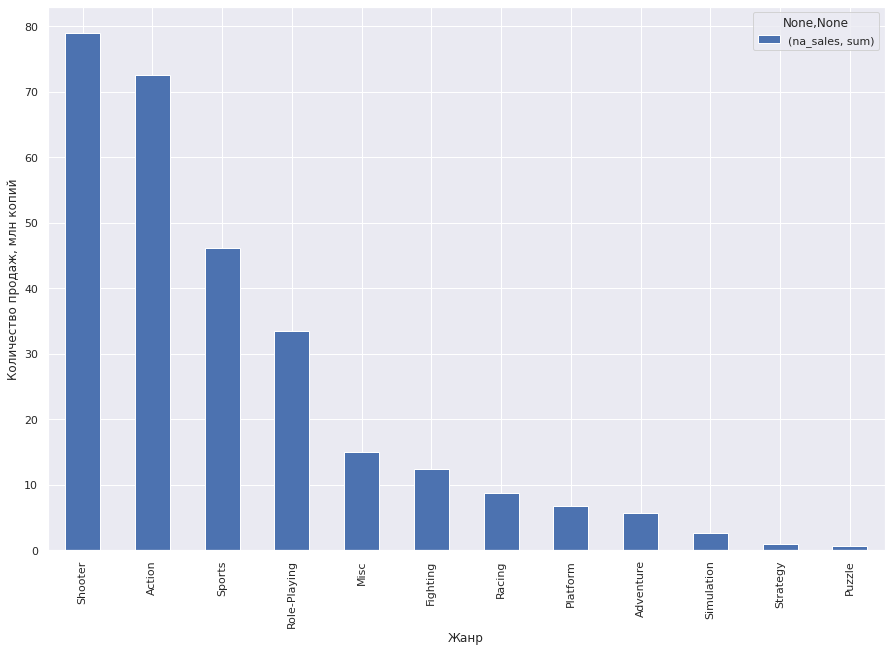

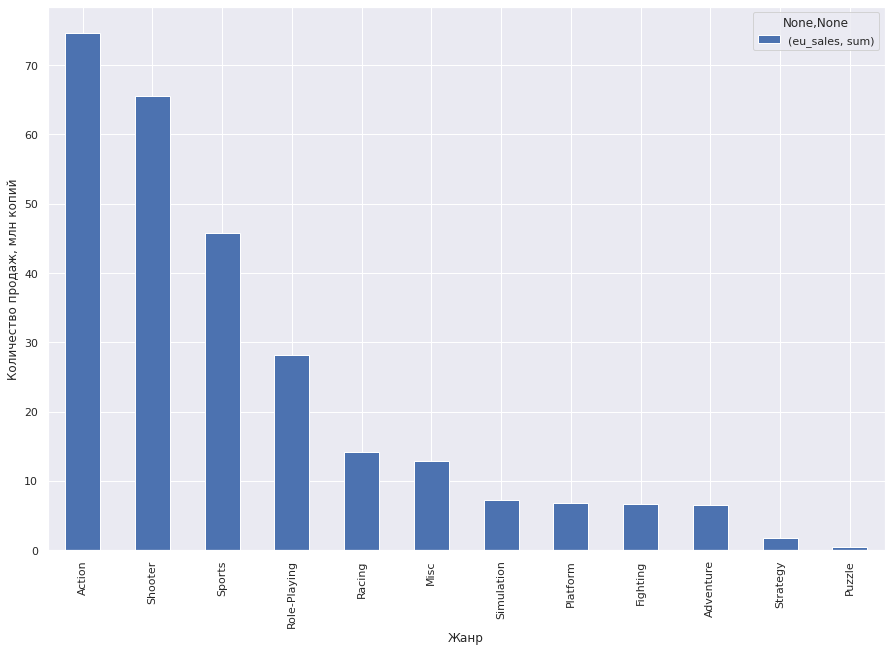

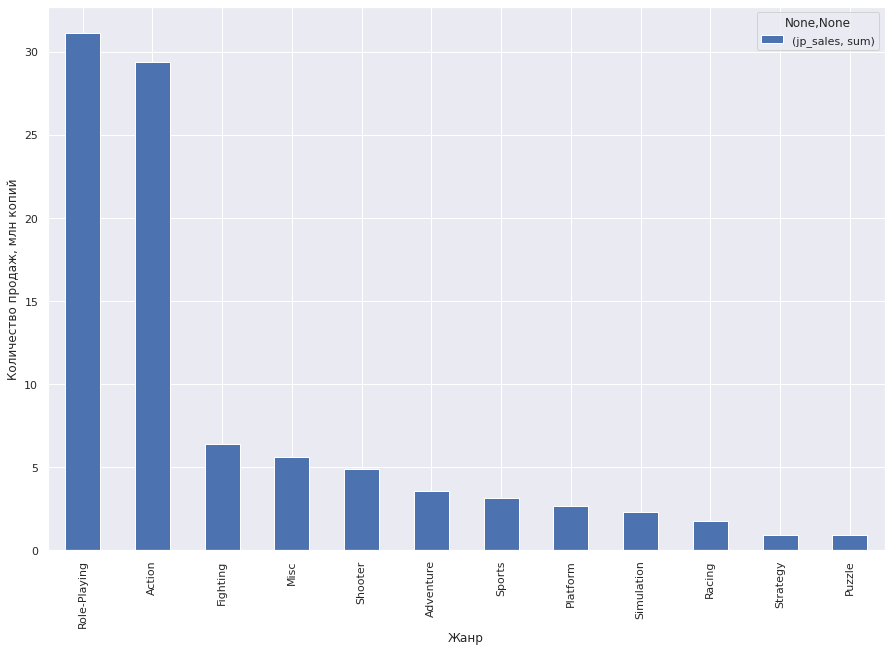

In [85]:
data_filtered.groupby(
    ['genre']).agg({'na_sales':['sum']}).sort_values(
    by = ('na_sales', 'sum'), ascending=False).plot(
    xlabel='Жанр', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10))
data_filtered.groupby(
    ['genre']).agg({'eu_sales':['sum']}).sort_values(
    by = ('eu_sales', 'sum'), ascending=False).plot(
    xlabel='Жанр', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10))
data_filtered.groupby(
    ['genre']).agg({'jp_sales':['sum']}).sort_values(
    by = ('jp_sales', 'sum'), ascending=False).plot(
    xlabel='Жанр', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10))

In [86]:
data_filtered.head(20).sort_values(by='na_sales')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,50,E,7.60
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,57,E,6.08
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,43,E,8.58
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93,79,T,5.39
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,66666,66666,No_Rate,4.72
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,66666,66666,No_Rate,5.27
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76,61,T,5.64
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,65,M,7.17
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,66666,66666,No_Rate,4.87
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,57,M,7.66


In [87]:
data_filtered.head(20).sort_values(by='eu_sales')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,66666,66666,No_Rate,4.87
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,66666,66666,No_Rate,7.55
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,66666,66666,No_Rate,7.14
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,54,M,5.26
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,66666,66666,No_Rate,4.72
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76,61,T,5.64
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,66666,66666,No_Rate,7.39
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88,91,E,7.09
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,79,M,5.47
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,66666,66666,No_Rate,5.27


In [88]:
data_filtered.head(20).sort_values(by='jp_sales')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,66666,66666,No_Rate,5.27
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,79,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,54,M,5.26
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,66666,66666,No_Rate,7.39
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,57,E,6.08
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,43,E,8.58
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,66666,66666,No_Rate,4.72
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,50,E,7.60
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,57,M,7.66
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76,61,T,5.64


#### Вывод

Топ 5 жанров в Америке: Shooter, Action, Sports, Role-Playing, Misc. Лидируют Shooter и Action. 

Топ 5 жанров в Европе: Action, Shooter, Sports, Role-Playing, Racing. Лидируют Action и Shooter.

Топ 5 жанров в Японии: Role-Playing, Action, Fighting, Misc, Shooter. Продажи в жанрах Role-Playing и Action лидируют с большим отрывом.
    
Игры в жанре Action самые продаваемые и самые прибыльные, мы это уже выяснили.
А вот популярность жанра Shooter на западном рынке и Role-Playing в Японии обусловлена популярностью серий отдельных игр: серии Pokemon в Японии и серии Call of Duty на западе. 

Думаю, что не последнюю роль играет и распространенность консолей разных типов: на популярных в Японии портативных консолях играть в шутеры неудобно.
   


### Влияние ESRB 

<AxesSubplot:xlabel='Рейтинг ESRB', ylabel='Количество продаж, млн копий'>

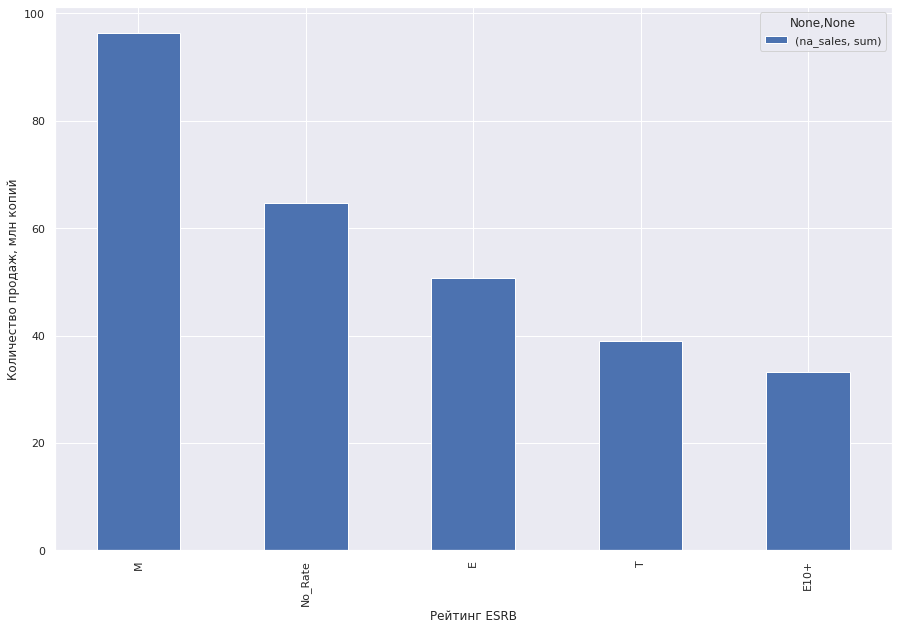

In [89]:
data_filtered.groupby(
    ['rating']).agg({'na_sales':['sum']}).sort_values(
    by = ('na_sales', 'sum'), ascending=False).plot(
    xlabel='Рейтинг ESRB', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10))

<AxesSubplot:xlabel='Рейтинг ESRB', ylabel='Количество продаж, млн копий'>

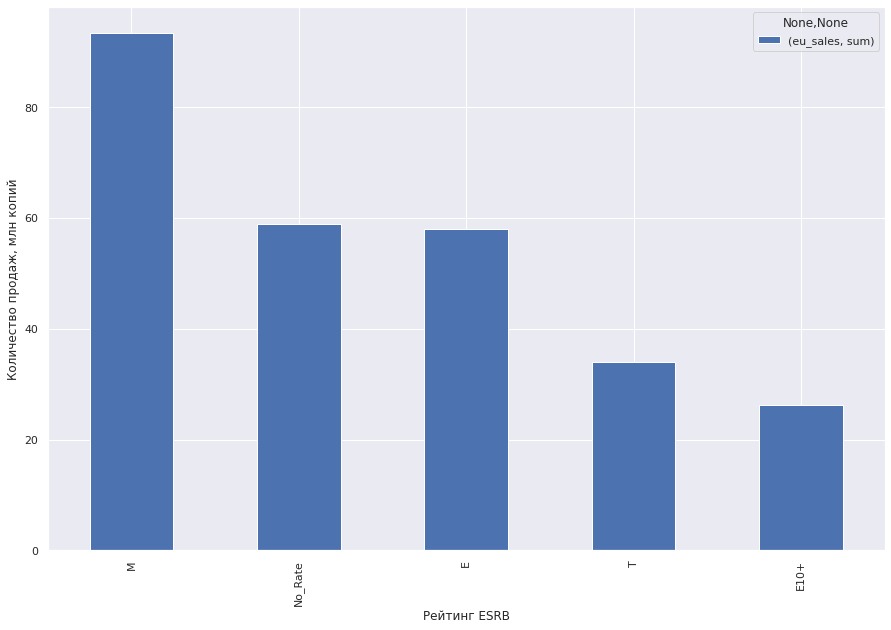

In [90]:
data_filtered.groupby(
    ['rating']).agg({'eu_sales':['sum']}).sort_values(
    by = ('eu_sales', 'sum'), ascending=False).plot(
    xlabel='Рейтинг ESRB', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10))

<AxesSubplot:xlabel='Рейтинг ESRB', ylabel='Количество продаж, млн копий'>

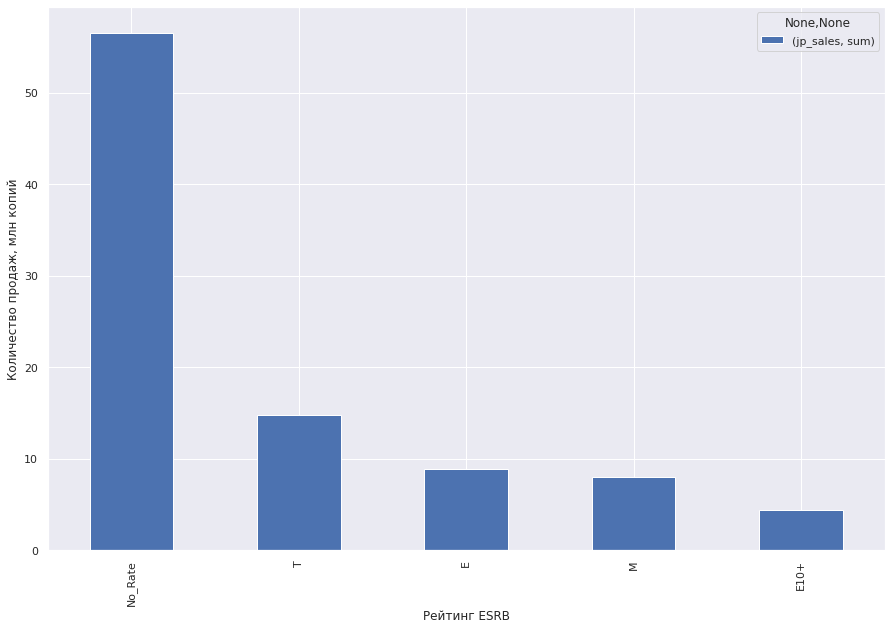

In [91]:
data_filtered.groupby(
    ['rating']).agg({'jp_sales':['sum']}).sort_values(
    by = ('jp_sales', 'sum'), ascending=False).plot(
    xlabel='Рейтинг ESRB', ylabel='Количество продаж, млн копий', kind='bar', figsize=(15,10))

#### Вывод

Интересно, что большую часть продаж на западном рынке приносят игры с рейтингом «M» («Mature») — «Для взрослых», которые могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

По японскому рынку сложно сказать что-то определенное ввиду превалирования игр с отсутствием данных по рейтингу.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Отличные выводы и визуализации!

## Гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC отличаются

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Гипоиезы сформулированы верно

Совокупности независимы, поэтому применяем метод st.ttest_ind для гипотез о равенстве средних двух генеральных совокупностей; не уверены в равенстве дисперсий, поэтому указываем equal_var.

In [92]:
data_filtered_xone = data_filtered.query('platform == "XOne" & critic_score != 66666 & user_score != 66666')
data_filtered_pc = data_filtered.query('platform == "PC" & critic_score != 66666 & user_score != 66666')

array1 = data_filtered_xone['user_score']
array2 = data_filtered_pc['user_score']
alpha = 0.05

results = st.ttest_ind(array1, array2, equal_var=True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print('Гипотеза о равенстве рейтингов Xbox One и PC отвергается')
else:
    print('Гипотеза о равенстве рейтингов Xbox One и PC не отвергается')

p-значение: 0.12817793652640008
Гипотеза о равенстве рейтингов Xbox One и PC не отвергается


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Перепроверим по актуальному периоду?(

<div class="alert alert-info">
<b> Точно, косяк) Поправил</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Окей) 

### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b> ГИпотезы сформулированы неверно

<div class="alert alert-info">
<b> Поправил</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ага, нулевая всегда звучит о равенстве, а альтернативная о неравенстве

Совокупности независимы, поэтому применяем метод st.ttest_ind для гипотез о равенстве средних двух генеральных совокупностей; не уверены в равенстве дисперсий, поэтому указываем equal_var.

In [93]:
data_filtered_action = data_filtered.query('genre == "Action" & critic_score != 66666 & user_score != 66666')
data_filtered_sports = data_filtered.query('genre == "Sports" & critic_score != 66666 & user_score != 66666')

array1 = data_filtered_action['user_score']
array2 = data_filtered_sports['user_score']
alpha = 0.05

results = st.ttest_ind(array1, array2, equal_var=True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print('Гипотеза о равенстве рейтингов игр Action и Sports отвергается')
else:
    print('Гипотеза о равенстве рейтингов игр Action и Sports не отвергается')

p-значение: 4.0540895999943536e-10
Гипотеза о равенстве рейтингов игр Action и Sports отвергается


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Перепроверим)

<div class="alert alert-info">
<b> Исправил, но, откровенно говоря, до конца так и не понял для чего нужны в принципе гипотезы в плане практического применения</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ну у тебя есть какие-нибудь данные, выдвигаешь гипотезы, и проверяешь их в формате "да-нет") 

## Общий вывод

 <br>         Перед основным этапом исследования была проведена предобратка данных. В ходе нее мы удалили строки с пропусками в столбцах 'name' и 'genre', поставили заглушки для анализа в столбцах 'year_of_release', 'critic_score' и 'user_score', переформатировали тип данных в столбцах 'year_of_release', 'critic_score' и 'user_score', устранили неявные дубликаты в столбце 'rating', убрали аномалии и избавились от выбросов в столбце 'year_of_release', рассчитали значения и добавили новый столбец 'all_sales', построили первоначальные гистограммы.
    
Целями основного этапа исследования были исследовательский анализ отфильтрованных данных, определение суммарных продаж по регионам, выявление актуального периода исследования, составление актуального портрета пользователя каждого региона, проверка гипотез о равенстве рейтингов  платформ Xbox One и PC и жанров Action и Sports.  В ходе него мы выяснили количество продаж игр в разных жанрах, на разных платформах и в разных регионах, сделали прогноз на успешность платформ в 2017 году, выявили влияние оценок критиков и пользователей и рейтинга ESRB на продажи, определили коэффициенты корреляции, построили сводные таблицы, сделали графическое отображение результатов.
    
'Золотым' временем для игровой индустрии стал период с 2006 по 2011 годы: в это время количество выпускаемых игр превышало 1000. В последующие годы число релизов сократилось практически вдвое. До 1994 года выпускалось менее 100 игр в год, этот период мы исключили из анализа. 
    
В среднем время 'жизни' платформы составляет 11 лет, а высокие показатели продаж она показывает 7-8 лет, затем как правило ее меняет консоль нового поколения.     
    
Актуальным периодом для исследования и составления прогноза на 2017 год взяли временной отрезок с 2014 по 2016 годы. В ходе анализа выяснили, что на рынке господствуют 3 производителя: американская Microsoft и японские Sony и Nintendo, причем последняя успешна прежде всего благодаря своим портативным консолям (серия DS), в отличие от своих конкурентов, делающих основную ставку на домашние платформы (серии PS и Xbox). 
    
Домашние платформы в целом более успешны в продажах своих игр: в топ 5 за последние годы не попало ни одной портативной консоли. Но примечательно, что за последний год исследования только 1 приставка показала незначительный рост и ею оказалась портативная 3DS, в то время как ее домашние конкуренты снизили свои показатели. Думаю, что у Nintendo есть потенциал в 2017 году прежде всего на рынке портативных платформ, где она является безусловным лидером, но догнать по продажам титанов рынка домашних консолей вряд ли получится. Sony и Microsoft продолжат борьбу за лидерство, в которой пока неясно кто станет фаворитом: последняя модель Sony PS4 обгоняет своего прямого конкурента Xone, но при этом творение Xbox прошлого поколения X360 все еще показывает очень хорошие продажи. Создается впечатление, что либо фанаты PS быстрее обновили свои консоли до последней версии, либо что разработчики предпочитают предыдущую версию Xbox в силу убеждений или технических особенностей. Ну и поклонников PC, несмотря на все большую популярность консолей, нельзя совсем сбрасывать со счетов, ведь большинство игр выпускается в ПК версии, однако из-за распространенности пиратства разработчики часто недополучают прибыль.
     
Сравнивая влияние отзывов критиков и пользователей на продажи игр , мы выяснили, что с оценками критиков коррелируют продажи на всех платформах (для сравнения взяли PS4, Xone и 3DS): Sony и Microsoft сильнее, чем Nintendo. А вот при расчете корреляции продаж с оценками пользователей столкнулись с необычным результатом: продажи на 3DS зависят от оценок пользователей примерно также, как и от оценок критиков, зато у PS4 и Xone вообще отсутсвует корреляция с пользовательскими оценками. Мы привели 3 версии, объясняющие это явление:

    1. Критики получают игру на предрелизе и весомая часть продаж совершается до сбора данных о мнении пользователей.
    2. Это может быть обусловлено дорелизной популярностью самих игр. Например, у известных серий игр есть уже фанатская база и изначально выше шансы быть купленными вне зависимости от пользовательских оценок, чем у новых малоизвестных игр и разработчиков. Эта версия подтверждается большим количеством продаж (выше 4 млн копий) игр со средним или даже ниже среднего рейтингом. Также это косвенно показывает количество игр с высоким рейтингом и малым числом проданных копий: небольшие инди игры часто имеют много положительных оценок, но при этом нацелены на небольшой пользовательский сегмент.
    3. При просмотре в онлайн магазине игр с самой консоли пользовательский рейтинг не отображается да и мало кому хочется его писать с джойстика.
     
Что касается различий между географическими рынками сбыта, мы получили следующие результаты:

    1. В Северной Америке пользователи предпочитают игры на PS4 и XOne в жанре Shooter и Action.
    2. В Европе ситуация похожа, но игроки отдают предпочтение устройствам японской Sony, нежели американской Microsoft.
    3. В Японии максимальная популярность у портативной 3DS, а американские консоли вообще не представлены в топ 5. Местные пользователи как и все остальные любят игры в жанре Action, но в отличии от западных геймеров шутерам предпочитают RPG (Role-Playing).
Есть предположение, что высокие продажи игр жанра Shooter на западном рынке и Role-Playing в Японии обусловлена популярностью серий отдельных игр: серии Pokemon в Японии и серии Call of Duty на западе, и что не последнюю роль играет распространенность консолей разных типов: на популярных в Японии портативных консолях играть в шутеры неудобно.

Также в ходе анализа мы пришли к выводу, что игры с рейтингом ESRB 'M' ('Для взрослых') на западных рынках продаются лучше остальных, несмотря на ограничения. 
    
В конце исследования мы рассмотрели гипотезы о равенстве рейтингов Xbox One и PC и о неравенстве рейтингов игр 
Action и Sports и получили следующие результаты:
    
    1. Средние пользовательские рейтинги платформ Xbox One и PC могут быть равны.    
    2. Средние пользовательские рейтинги жанров Action и Sports могут быть не равны.
    
<br/> 

   

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Исправим замечания и доработаем вывод) Не забывай подписывать оси и заголовки у графиков) 

<div class="alert alert-info">
<b> Исправил</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Вывод отражает проделанную работу!

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
Денис, спасибо за  проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец!
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Отличные визуализации
    
    3. На разных шагах проекта ты предлагала очень интересные решения и методы для их реализации. Хорошая работа!
    
    
**На что стоит обратить внимание**:
    
    1. Неверно определены прибыльные продажи по жанрам
    
    2. Проверка гипотез выполнена не по акутальному периоду
    
    
**Удачи и жду твой проект на повторное ревью!**

<div class="alert alert-info">
<b> Большое спасибо за ревью, Евгений! С большинством замечаний согласен полностью, за поддержку отдельная благодарность, я старался)
    
ПС. Меня 'слегка' поджимают сроки, если остались некритические моменты после правки, укажи плиз, все обязательно посмотрю  - но прошу чуть снисхождения) Естественно, касается только негрубых ошибок </b> 
</div>

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v2**:
Денис, ошибки исправлены, проект принят, поздравляю тебя! Успешной учебы и еще увидимся в Практикуме!